In [7]:
import datetime
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import gc
import random
from quandl import QuandlError
plt.style.use('alex')

pd.options.display.max_rows = 1000
pd.options.display.float_format = '{:,.4f}'.format

In [2]:
from MarketAssist import Market as Market
W = Market.Market(Market_file = 'C:/Users/awright/Desktop/January 2018/Other/trading/Market Histories/WIKIP2000_trimmed_filled.csv'
                  ,mavg_df_file = 'C:/Users/awright/Desktop/January 2018/Other/trading/Market Histories/WIKIP2000_trim_fill_mavgdf.csv' )

In [3]:
maxs = W.History[['Symbol','Close']].groupby('Symbol').max()
mins = W.History[['Symbol','Close']].groupby('Symbol').min()

norm_df = W.History[['Symbol','Date','Close']]

In [5]:
norm_df.Close

99234    46.1764
99235    46.7823
99236    46.2260
99237    47.6663
99238    47.8153
99239    47.7755
99240    48.9178
99241    48.1927
99242    48.3615
99243    47.9940
99244    47.9245
99245    47.3186
99246    47.2988
99247    47.0703
99248    47.0306
99249    48.0834
99250    47.8451
99251    48.3218
99252    47.3484
99253    48.6397
99254    48.9277
99255    48.5701
99256    49.0469
99257    48.9376
99258    49.3051
99259    49.5932
99260    50.1295
99261    50.0203
99262    50.1792
99263    50.0501
99264    51.2718
99265    50.4970
99266    51.2817
99267    51.0036
99268    50.9937
99269    51.1228
99270    51.3910
99271    51.3115
99272    50.9539
99273    51.6889
99274    51.0334
99275    51.6293
99276    50.9043
99277    50.8645
99278    51.0632
99279    51.0831
99280    51.7982
99281    52.0962
99282    51.8578
99283    53.7350
99284    52.6921
99285    52.9504
99286    52.7915
99287    52.3048
99288    52.7716
99289    52.8213
99290    52.7219
99291    52.8808
99292    53.07

In [14]:
norm_df['NormPrice'] = norm_df[['Symbol','Close']].groupby('Symbol').transform(lambda x: x.index )

C:\Users\awright\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
norm_df['NormPrice'] =norm_df[['Symbol','Close']].groupby('Symbol').transform(lambda x: x / x[min(x.index)] )

C:\Users\awright\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Symbol       Date    Close  NormPrice
278      AAPL 2017-01-03 114.7154     1.0000
279      AAPL 2017-01-04 114.5870     0.9989
280      AAPL 2017-01-05 115.1697     1.0040
281      AAPL 2017-01-06 116.4536     1.0152
282      AAPL 2017-01-09 117.5203     1.0245
283      AAPL 2017-01-10 117.6388     1.0255
284      AAPL 2017-01-11 118.2709     1.0310
285      AAPL 2017-01-12 117.7771     1.0267
286      AAPL 2017-01-13 117.5697     1.0249
287      AAPL 2017-01-17 118.5178     1.0331
288      AAPL 2017-01-18 118.5079     1.0331
289      AAPL 2017-01-19 118.3005     1.0313
290      AAPL 2017-01-20 118.5178     1.0331
291      AAPL 2017-01-23 118.5968     1.0338
292      AAPL 2017-01-24 118.4882     1.0329
293      AAPL 2017-01-25 120.3746     1.0493
294      AAPL 2017-01-26 120.4339     1.0498
295      AAPL 2017-01-27 120.4437     1.0499
296      AAPL 2017-01-30 120.1277     1.0472
297      AAPL 2017-01-31 119.8512     1.0448
298      AAPL 2017-02-01 127.1597     1.1085
299      AAPL 2017-02-02 126.9425     1.1066
300      AAPL 2017-02-03 127.4857     1.1113
301      AAPL 2017-02-06 128.6807     1.1217
302      AAPL 2017-02-07 129.9054     1.1324
303      AAPL 2017-02-08 130.4091     1.1368
304      AAPL 2017-02-09 131.3474     1.1450
305      AAPL 2017-02-10 131.0498     1.1424
306      AAPL 2017-02-13 132.2103     1.1525
307      AAPL 2017-02-14 133.9263     1.1675
308      AAPL 2017-02-15 134.4123     1.1717
309      AAPL 2017-02-16 134.2487     1.1703
310      AAPL 2017-02-17 134.6206     1.1735
311      AAPL 2017-02-21 135.5927     1.1820
312      AAPL 2017-02-22 135.9994     1.1855
313      AAPL 2017-02-23 135.4241     1.1805
314      AAPL 2017-02-24 135.5530     1.1816
315      AAPL 2017-02-27 135.8208     1.1840
316      AAPL 2017-02-28 135.8804     1.1845
317      AAPL 2017-03-01 138.6577     1.2087
318      AAPL 2017-03-02 137.8344     1.2015
319      AAPL 2017-03-03 138.6478     1.2086
320      AAPL 2017-03-06 138.2113     1.2048
321      AAPL 2017-03-07 138.3899     1.2064
322      AAPL 2017-03-08 137.8741     1.2019
323      AAPL 2017-03-09 137.5567     1.1991
324      AAPL 2017-03-10 138.0129     1.2031
325      AAPL 2017-03-13 138.0725     1.2036
326      AAPL 2017-03-14 137.8642     1.2018
327      AAPL 2017-03-15 139.3223     1.2145
328      AAPL 2017-03-16 139.5504     1.2165
329      AAPL 2017-03-17 138.8561     1.2104
330      AAPL 2017-03-20 140.3142     1.2232
331      AAPL 2017-03-21 138.7073     1.2091
332      AAPL 2017-03-22 140.2745     1.2228
333      AAPL 2017-03-23 139.7785     1.2185
334      AAPL 2017-03-24 139.5008     1.2161
335      AAPL 2017-03-27 139.7389     1.2181
336      AAPL 2017-03-28 142.6352     1.2434
337      AAPL 2017-03-29 142.9526     1.2462
338      AAPL 2017-03-30 142.7641     1.2445
339      AAPL 2017-03-31 142.4963     1.2422
340      AAPL 2017-04-03 142.5360     1.2425
341      AAPL 2017-04-04 143.5973     1.2518
342      AAPL 2017-04-05 142.8534     1.2453
343      AAPL 2017-04-06 142.4963     1.2422
344      AAPL 2017-04-07 142.1789     1.2394
345      AAPL 2017-04-10 142.0103     1.2379
346      AAPL 2017-04-11 140.4828     1.2246
347      AAPL 2017-04-12 140.6514     1.2261
348      AAPL 2017-04-13 139.9075     1.2196
402255   AAPL 2017-04-14 139.9075     1.2196
349      AAPL 2017-04-17 140.6812     1.2263
350      AAPL 2017-04-18 140.0563     1.2209
351      AAPL 2017-04-19 139.5405     1.2164
352      AAPL 2017-04-20 141.2862     1.2316
353      AAPL 2017-04-21 141.1176     1.2302
354      AAPL 2017-04-24 142.4765     1.2420
355      AAPL 2017-04-25 143.3692     1.2498
356      AAPL 2017-04-26 142.4872     1.2421
357      AAPL 2017-04-27 142.6253     1.2433
358      AAPL 2017-04-28 142.4864     1.2421
359      AAPL 2017-05-01 145.4125     1.2676
360      AAPL 2017-05-02 146.3151     1.2755
361      AAPL 2017-05-03 145.8688     1.2716
362      AAPL 2017-05-04 145.3431     1.2670
363      AAPL 2017-05-05 147.7534     1.2880
364      AAPL 2017-05-08 151.7607     1.3229
36

In [47]:
mavg_set = [1,50,90]
thresh = 0
win = 10

maxs = W.History[['Symbol','Close']].groupby('Symbol').max()
mins = W.History[['Symbol','Close']].groupby('Symbol').min()

norm_df = W.History[['Symbol','Date','Close']]
norm_df['NormPrice'] = norm_df[['Symbol','Close']].groupby('Symbol').transform(lambda x: (x - np.mean(x)) / (np.std(x)))


datestart = min(norm_df.Date)

dateend = (str((datetime.datetime.now().date().year))
          + '-' + str((datetime.datetime.now().date().month))
          + '-' + str((datetime.datetime.now().date().day)))


symbols = norm_df.Symbol.unique()

mavg_dict = {'Date':norm_df[(norm_df['Date'] >= datestart) 
                                      & (norm_df['Date'] <= dateend)].Date.unique()}

for symbol in symbols:

    for mavg in mavg_set:

        label = symbol + '-' + str(mavg) + 'mavg'

        mavg_dict[label] = norm_df[(norm_df['Symbol'] == symbol) &
                                     (norm_df['Date'] >= datestart) 
                                      & (norm_df['Date'] <= dateend)].NormPrice.rolling(window=mavg).mean().values

norm_mavg_df = pd.DataFrame(mavg_dict)

start_time = time.time()
threshold = thresh
rolling_days = win
headers = ['Date'] + ['mavg' + str(mavg) for mavg in mavg_set] + ['Symbol','Trend','Reversal',
                                                               'Return','Close']
reversals = pd.DataFrame([], columns = headers).astype({headers[0]:str,
                                                        headers[1]:'float64',
                                                        headers[2]:'float64',
                                                        headers[3]:'float64',
                                                        headers[4]:str,
                                                        headers[5]:int,
                                                        headers[6]:int,
                                                        headers[7]:'float64',
                                                        headers[8]:'float64',}, parse_date = 'Date')

all_sym_df = pd.DataFrame([], columns = headers).astype({headers[0]:str,
                                                        headers[1]:'float64',
                                                        headers[2]:'float64',
                                                        headers[3]:'float64',
                                                        headers[4]:str,
                                                        headers[5]:int,
                                                        headers[6]:int,
                                                        headers[7]:'float64',
                                                        headers[8]:'float64',}, parse_date = 'Date')


for symbol in W.symbols:
    cols = ['Date']
    for mavg in mavg_set:
        col = symbol + '-' + str(mavg) + 'mavg'
        cols.append(col)

    sym_df = norm_mavg_df.loc[:,cols]
    sym_df = sym_df.fillna(0)
    sym_df = sym_df.assign(Symbol = symbol)
    sym_df = sym_df.assign(Trend = lambda x: x[cols[2]] < x[cols[3]])
    sym_df = sym_df*1
    sym_df = sym_df.assign(Reversal = 0)
    sym_df = sym_df.assign(Return = 0)

    sym_price = pd.DataFrame(W.History.loc[W.History.Symbol == symbol,['Symbol','Date','Close']])
    sym_df = sym_df.merge(sym_price, on = ['Date','Symbol'])



    sym_df.columns = headers
    sym_df = sym_df.assign(Diff = lambda x: x[headers[2]] - sym_df[headers[3]])

    sym_df['RollingDiffMin'] = sym_df.Diff.rolling(rolling_days).min()
    sym_df['RollingDiffMax'] = sym_df.Diff.rolling(rolling_days).max()

    sym_df.loc[(sym_df['Diff']  < threshold - 0.1) 
               & (sym_df['Diff'].shift(1) > threshold - 0.1)
               & (sym_df['Date'] >= min(sym_df.loc[sym_df[headers[3]] > 0 ].Date).to_pydatetime()), 'Reversal'] = -1
    sym_df.loc[(sym_df['Diff'] > threshold) 
               & (sym_df['Diff'].shift(1) < threshold)
               & (sym_df['Date'] >= min(sym_df.loc[sym_df[headers[3]] > 0 ].Date).to_pydatetime()), 'Reversal'] = 1
    
    if sym_df.loc[sym_df.Reversal != 0].Date.count() > 0:
        sym_df.loc[sym_df.Date == max(sym_df.Date),'Reversal'] = sym_df.loc[sym_df.Date == max(sym_df.loc[sym_df.Reversal != 0].Date).to_pydatetime()].Reversal.values[0]
    
    sym_df['RollingStd'] = sym_df.mavg1.rolling(window=30).std().values
    
    rev_df = sym_df[sym_df['Reversal'] != 0]
    rev_df = rev_df.assign(Return = lambda x: x.Close - x.Close.shift(1))
    rev_df.loc[rev_df['Reversal'].shift(1) == -1,'Return'] = -rev_df['Return']
    rev_df = rev_df.assign(PriceNormalizedReturn = lambda x: x.Return/x.Close)



    reversals = pd.concat([reversals,rev_df], ignore_index = True)
    all_sym_df = pd.concat([all_sym_df,sym_df],ignore_index = True)

total_return = reversals.PriceNormalizedReturn.sum()
results.append([mavg_set,thresh, win,total_return])
elapsed_time = time.time() - start_time
print('{:.3f} seconds | mavg set: {}, rolling_minmax_window: {}, soft thresh: {} ------- total return: {:.3f}'.format(elapsed_time,mavg_set, win, thresh, total_return))
#gc.collect()

C:\Users\awright\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


NameError: name 'results' is not defined

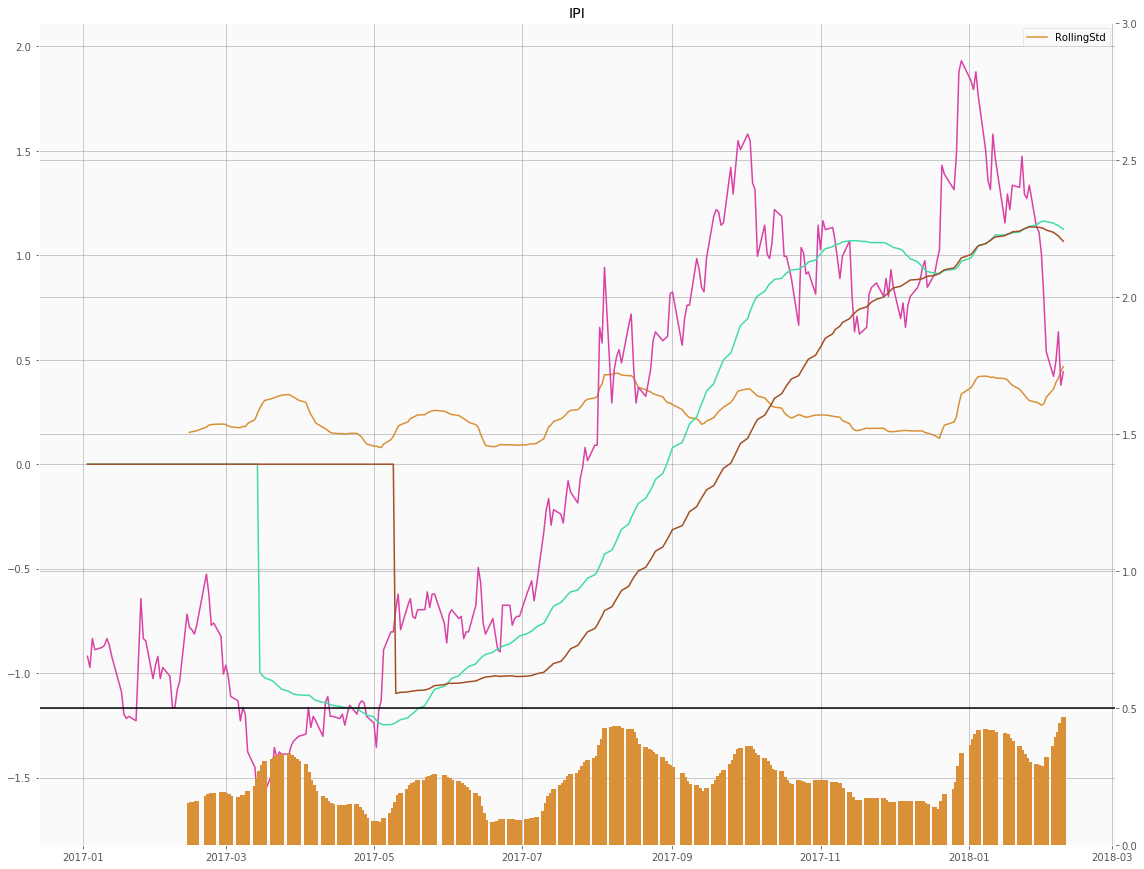

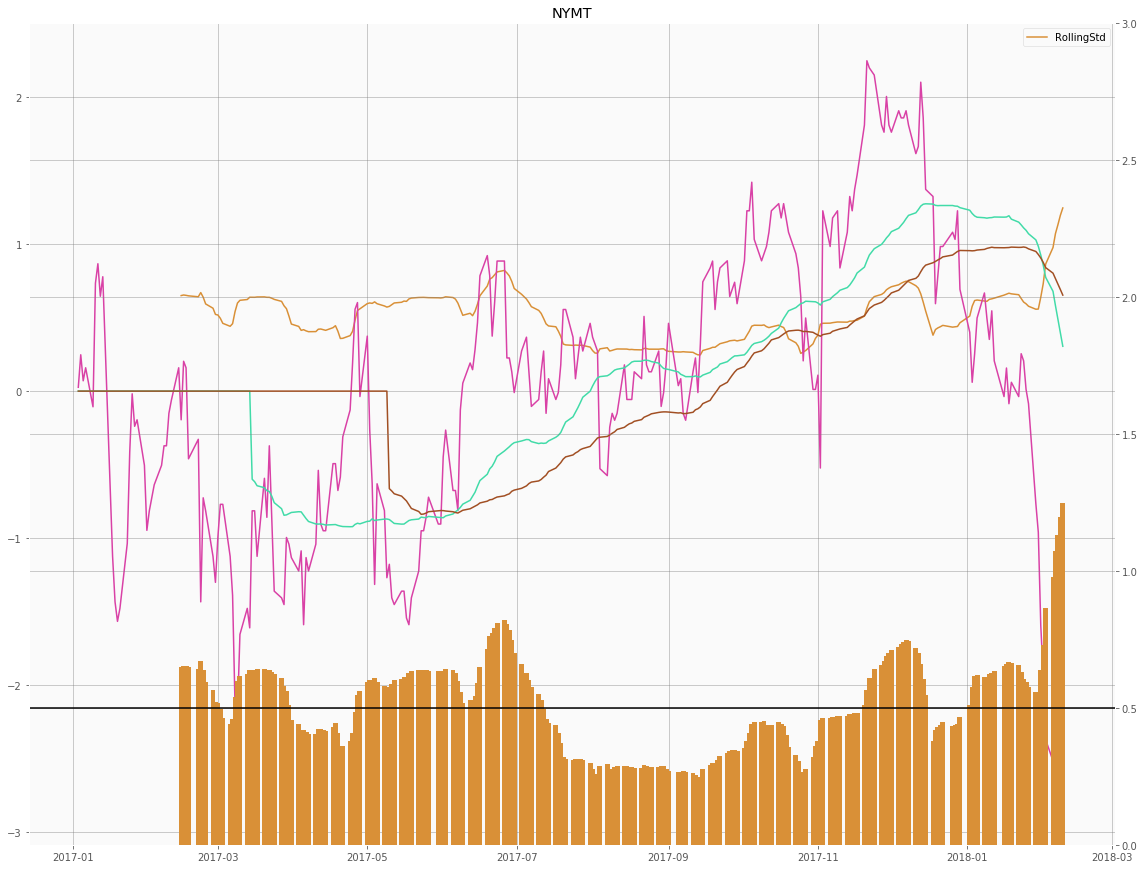

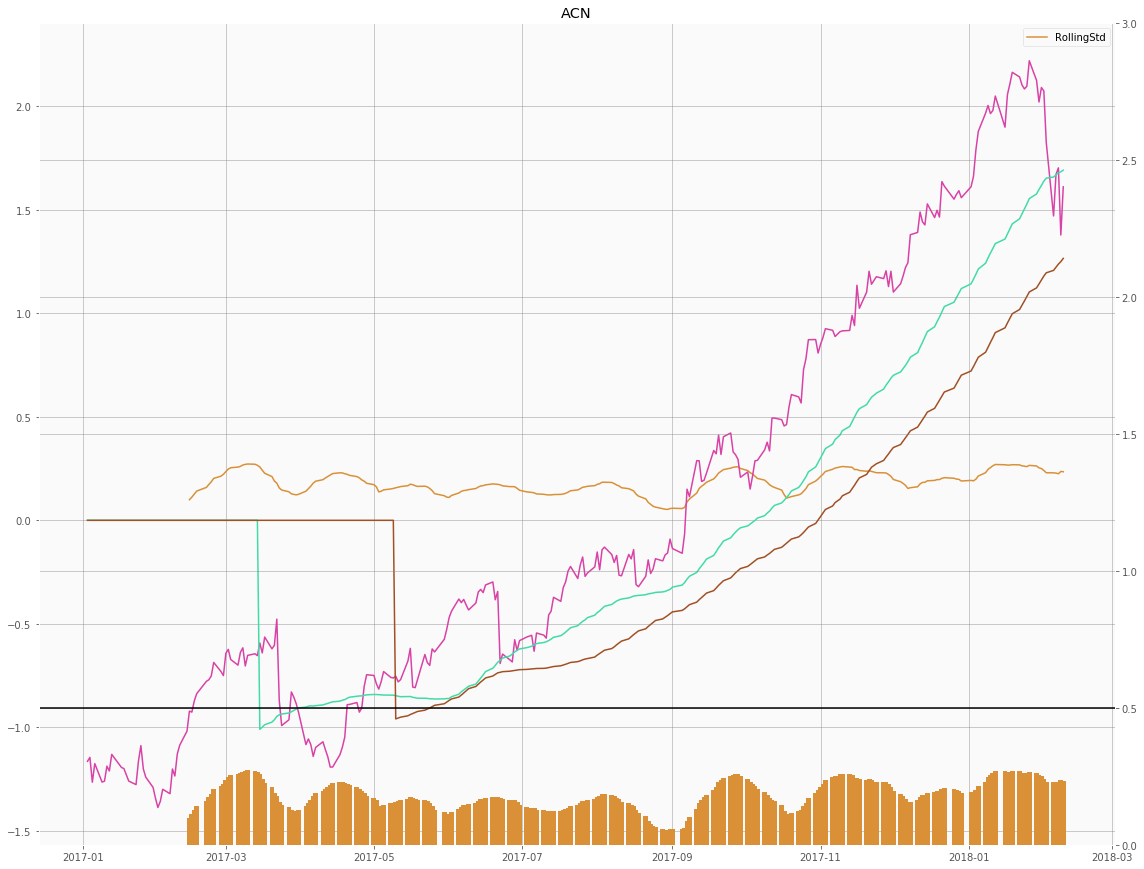

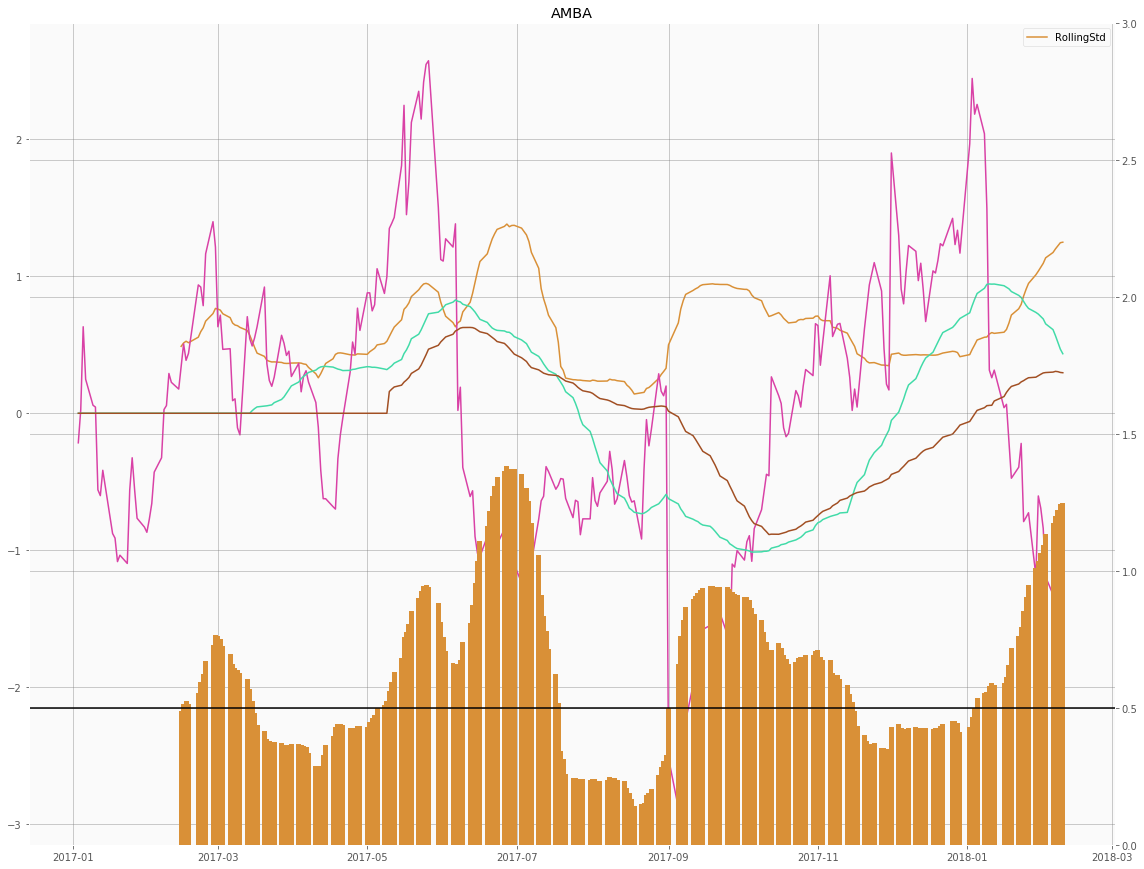

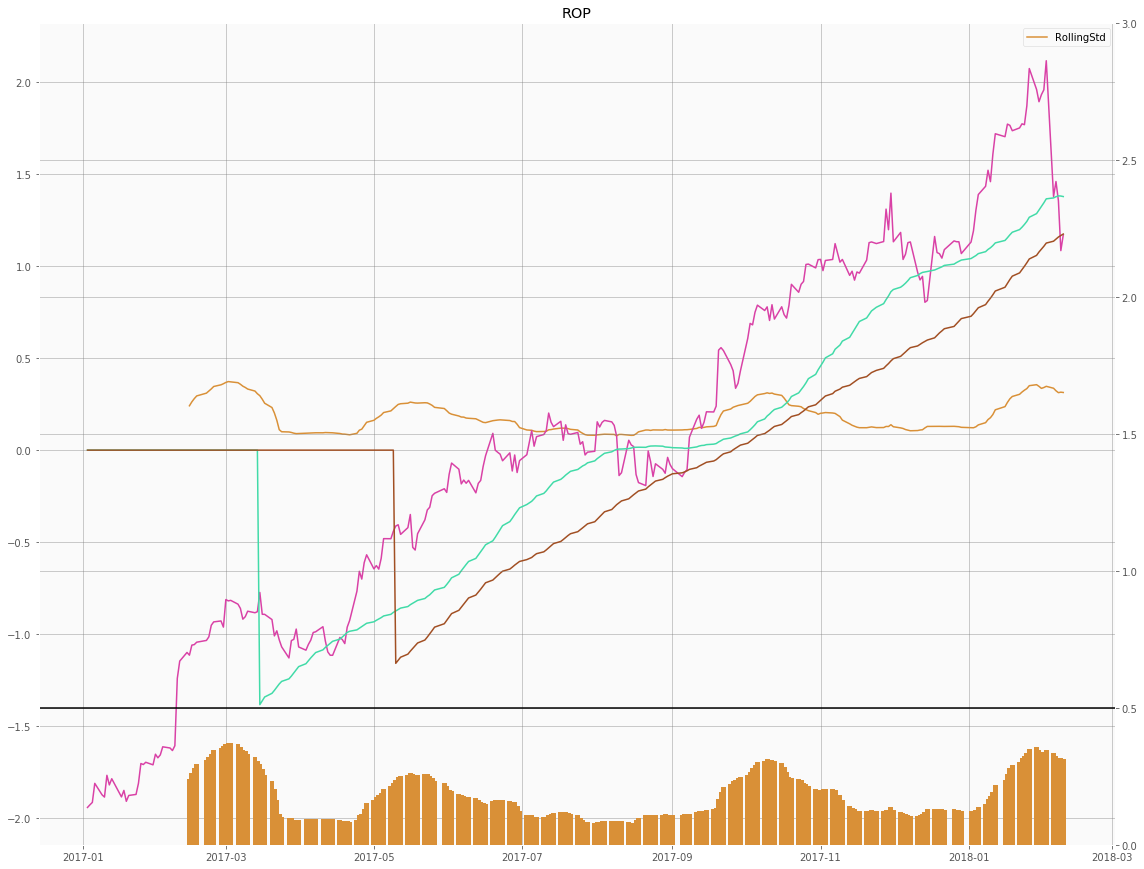

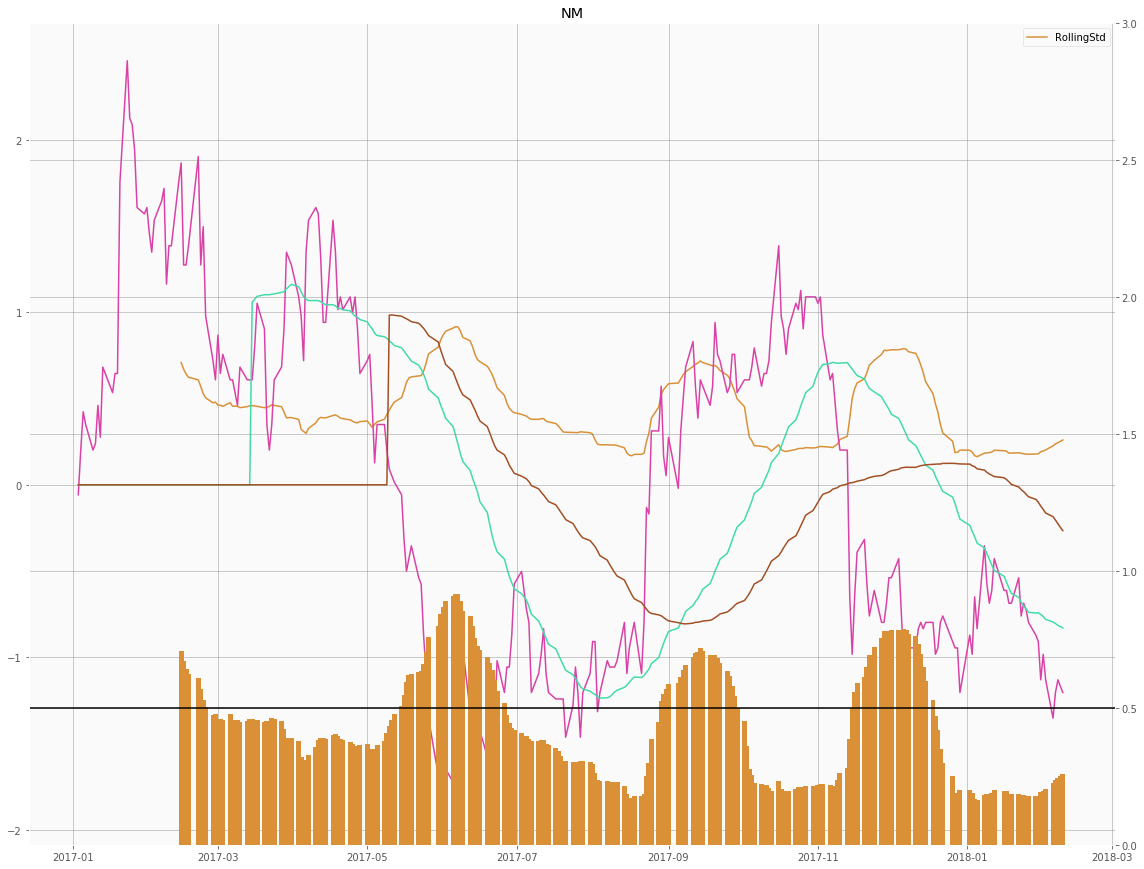

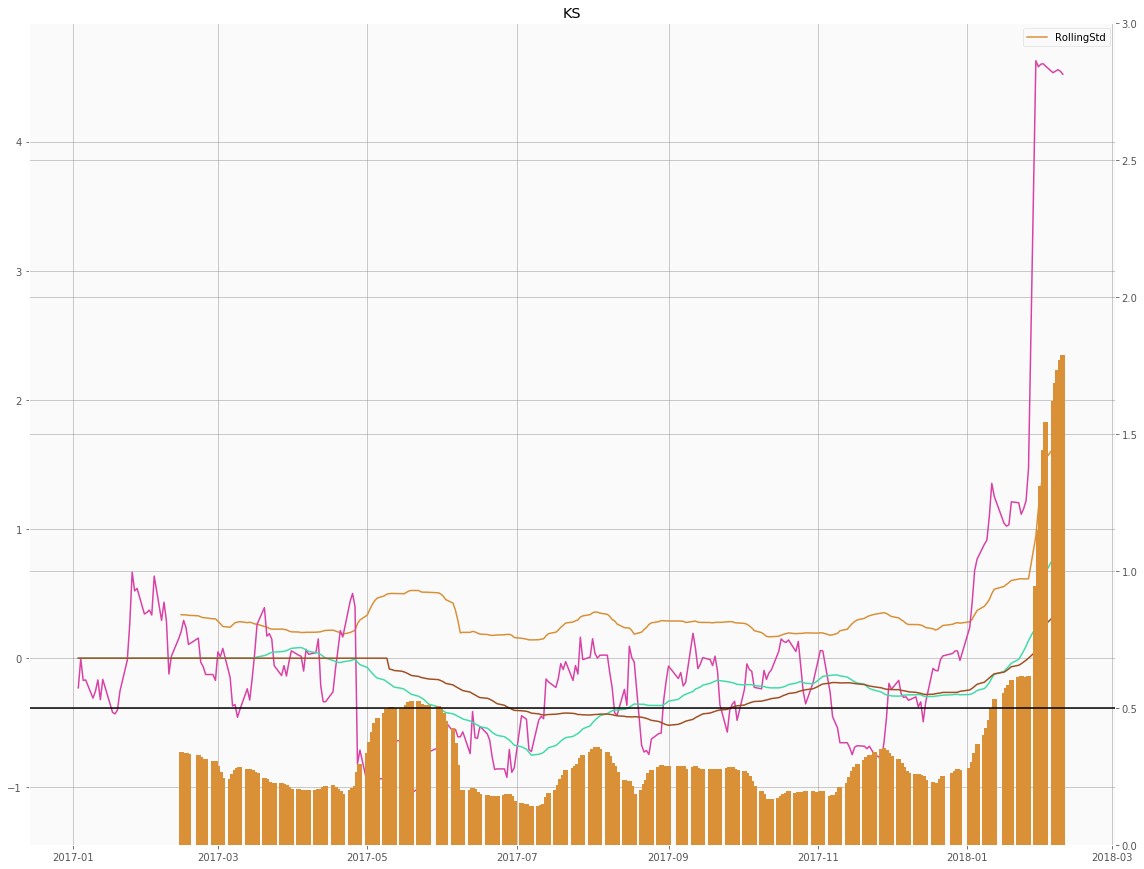

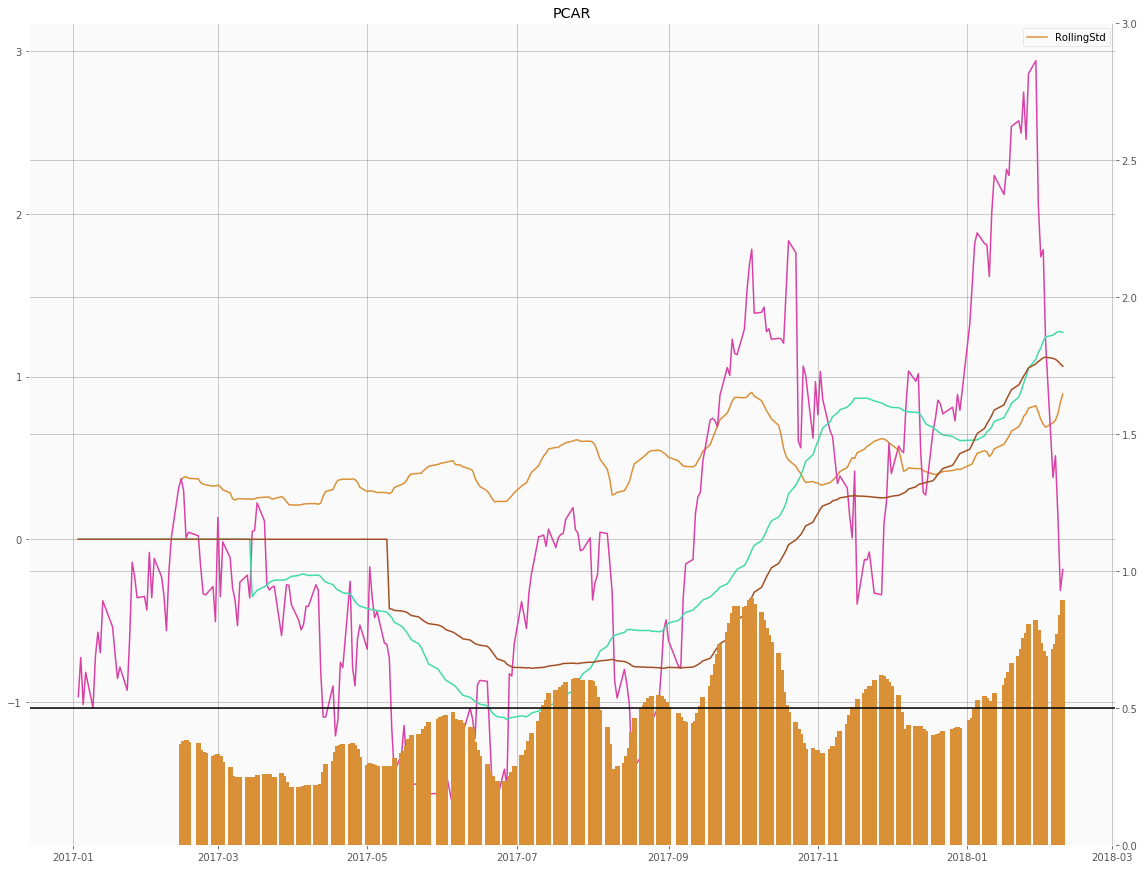

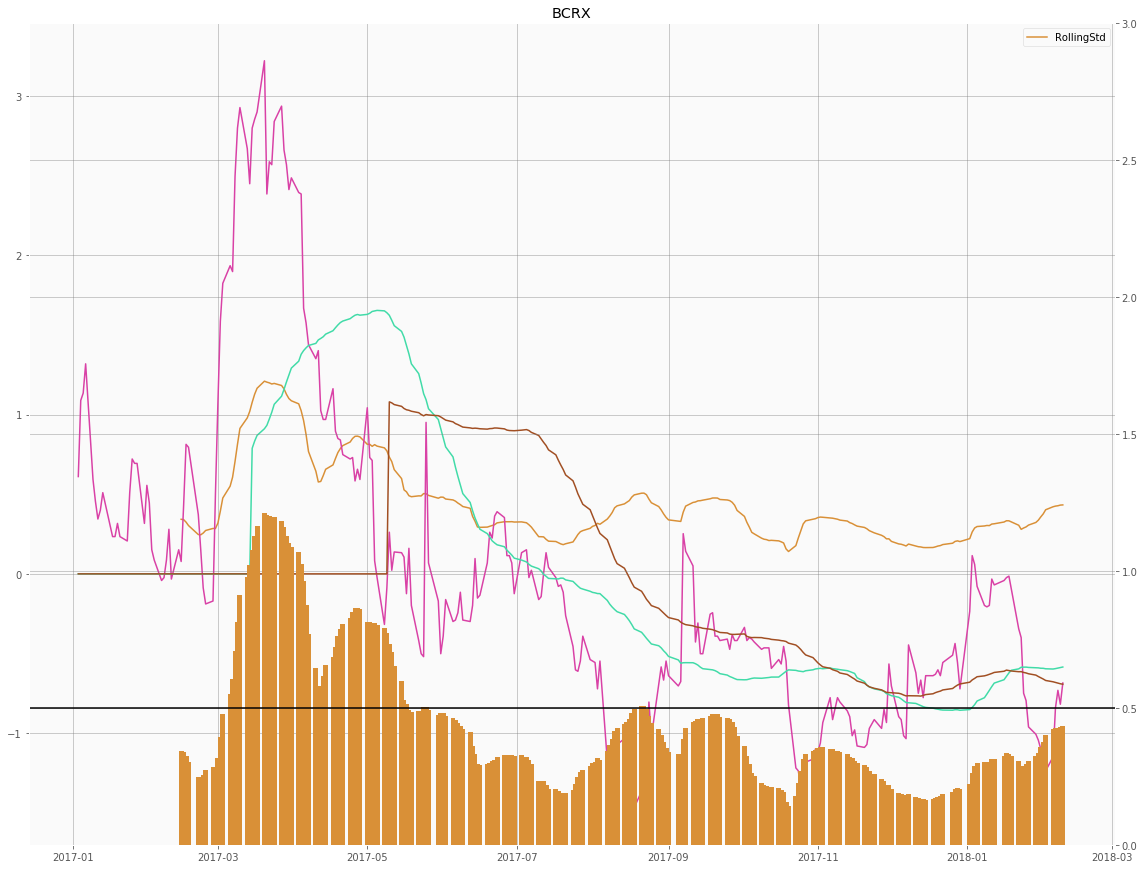

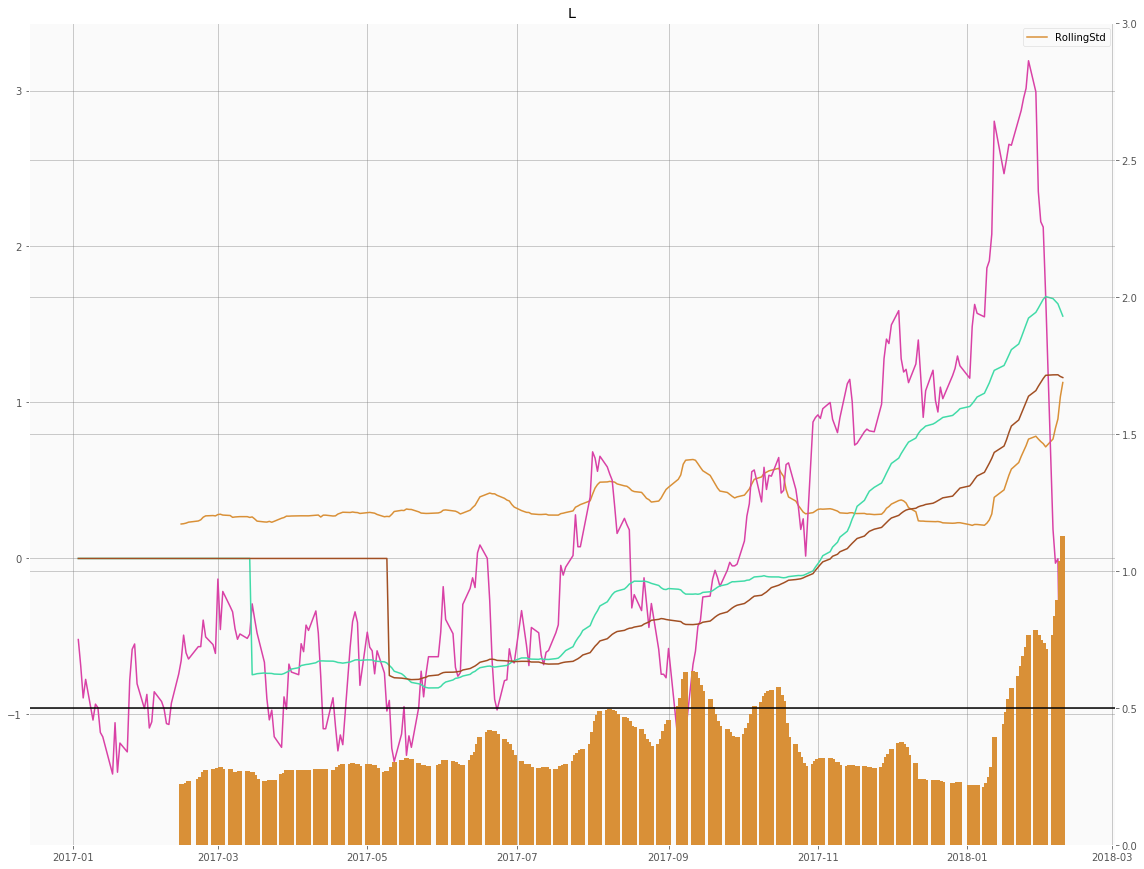

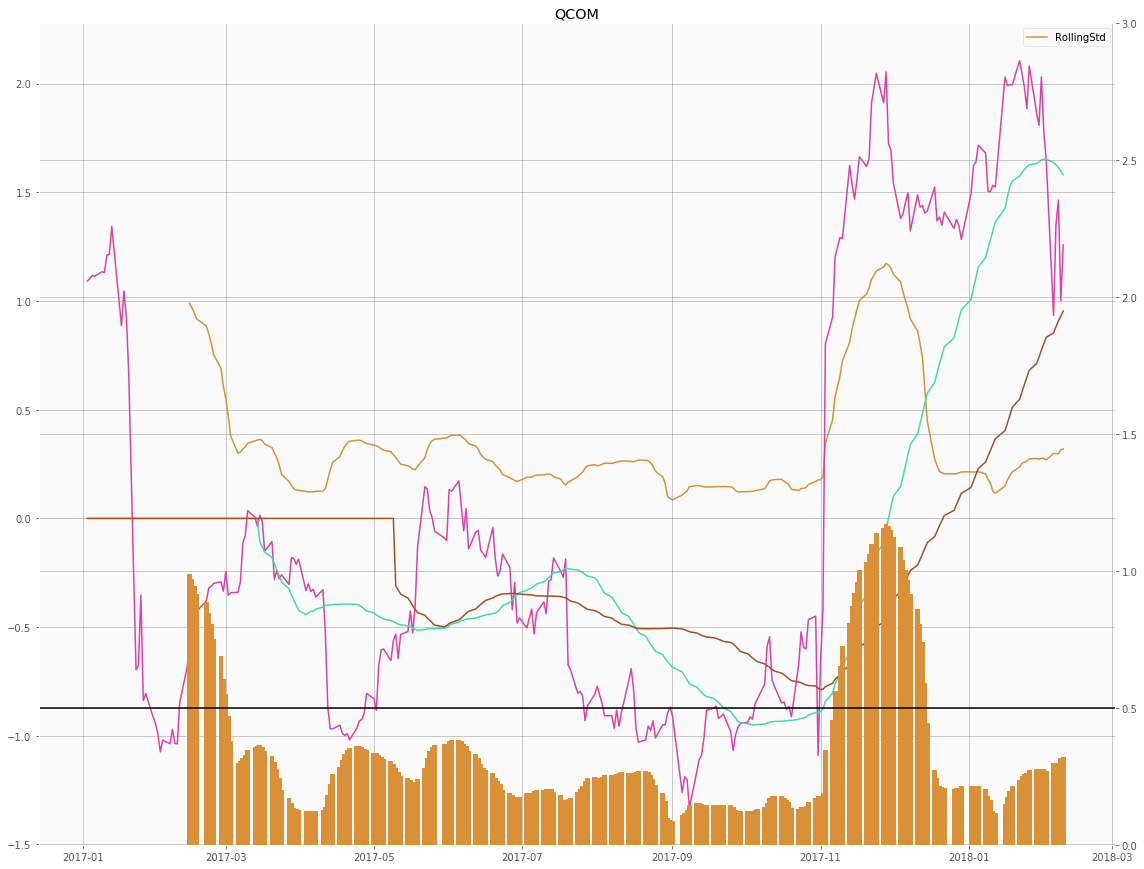

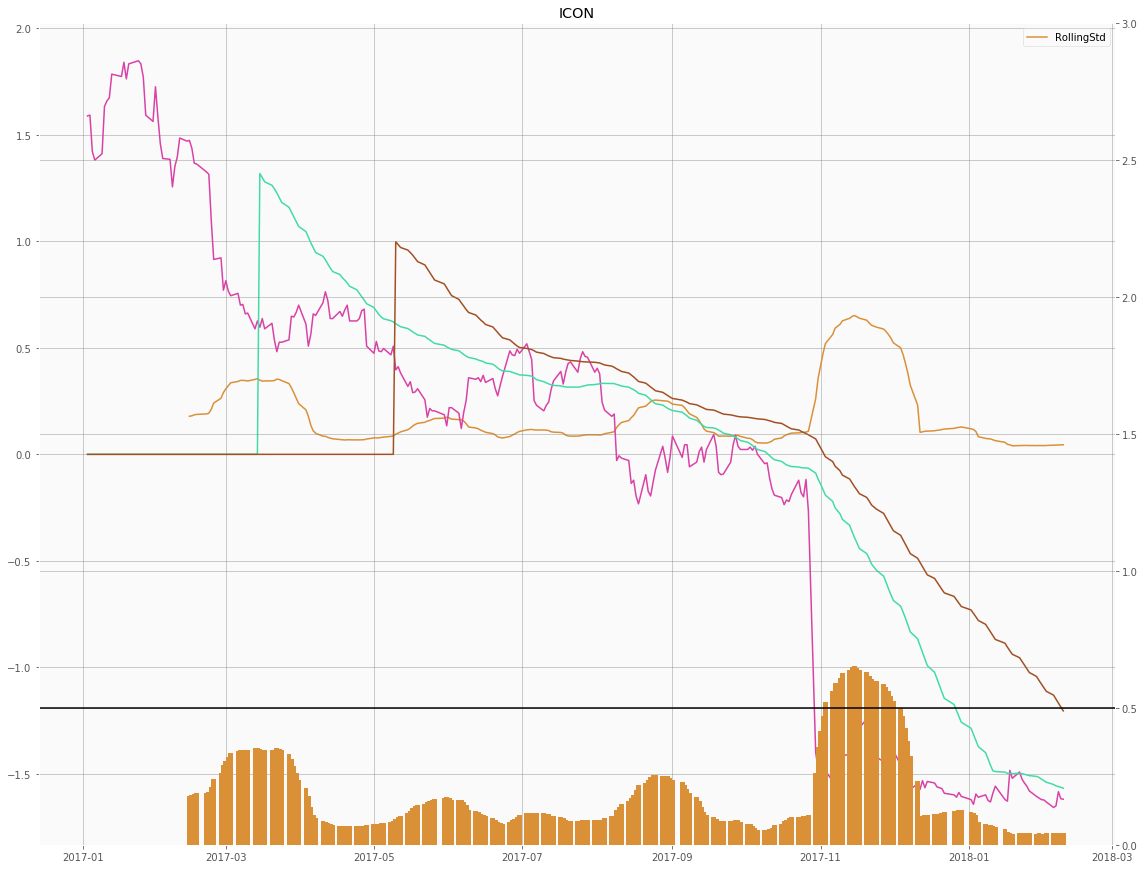

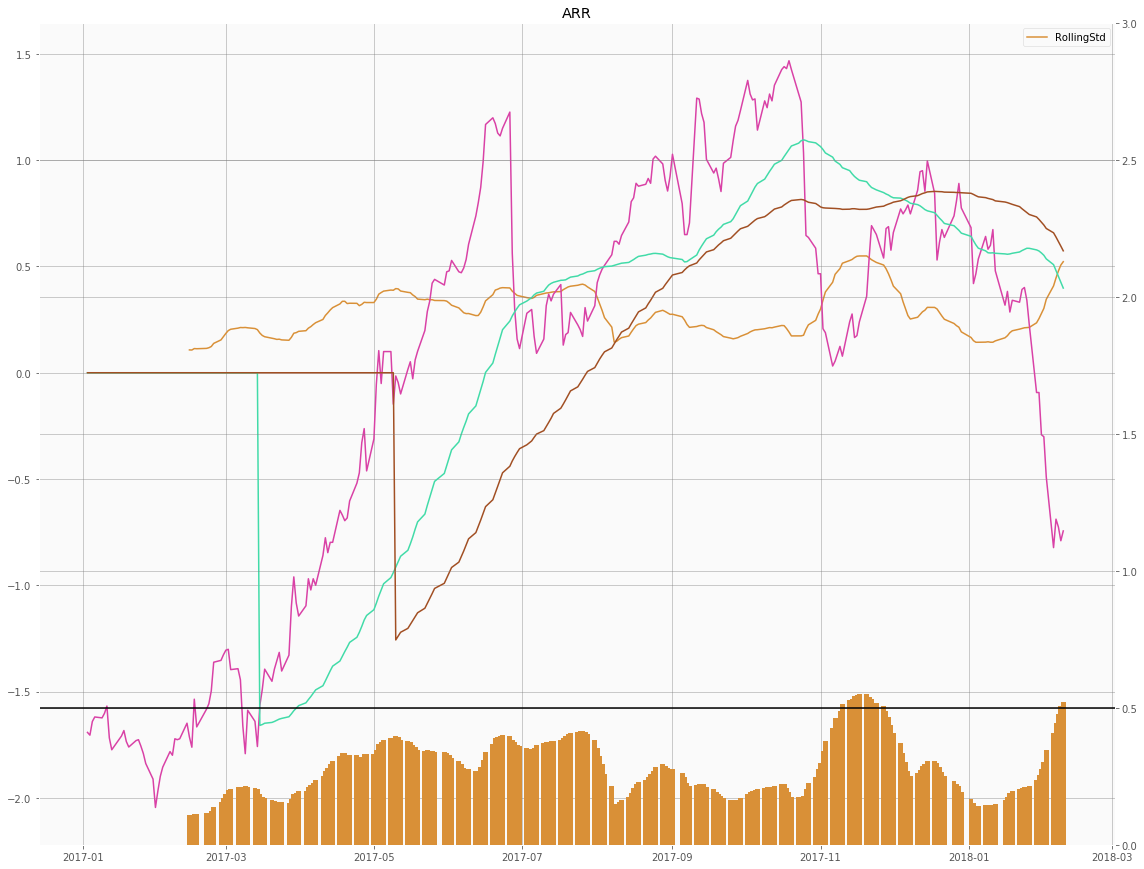

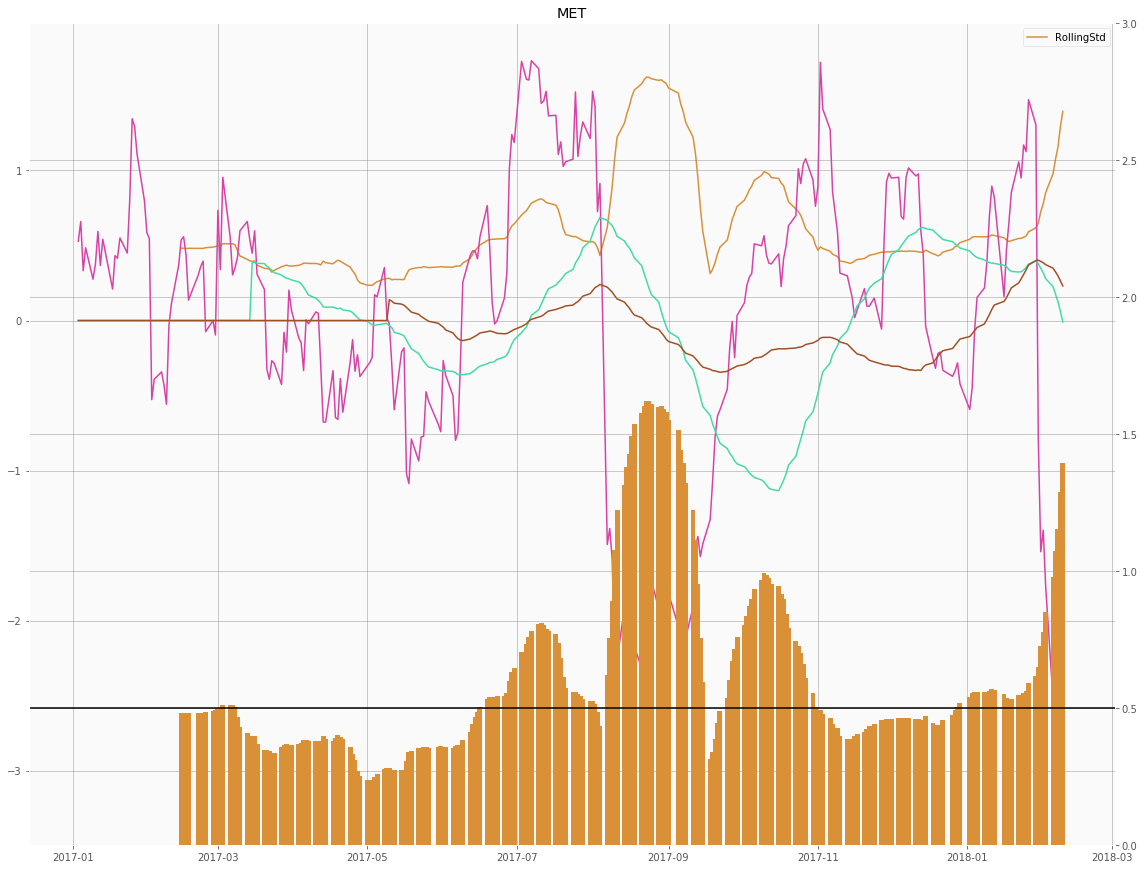

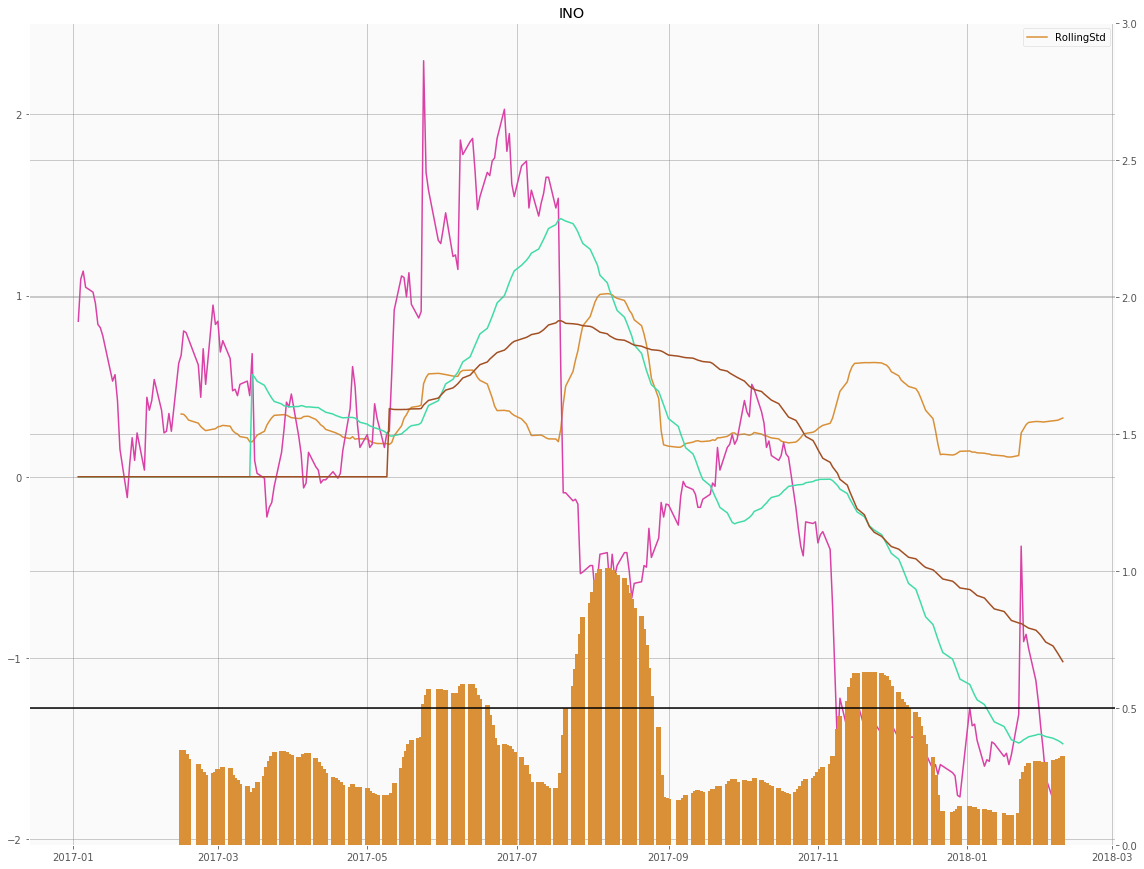

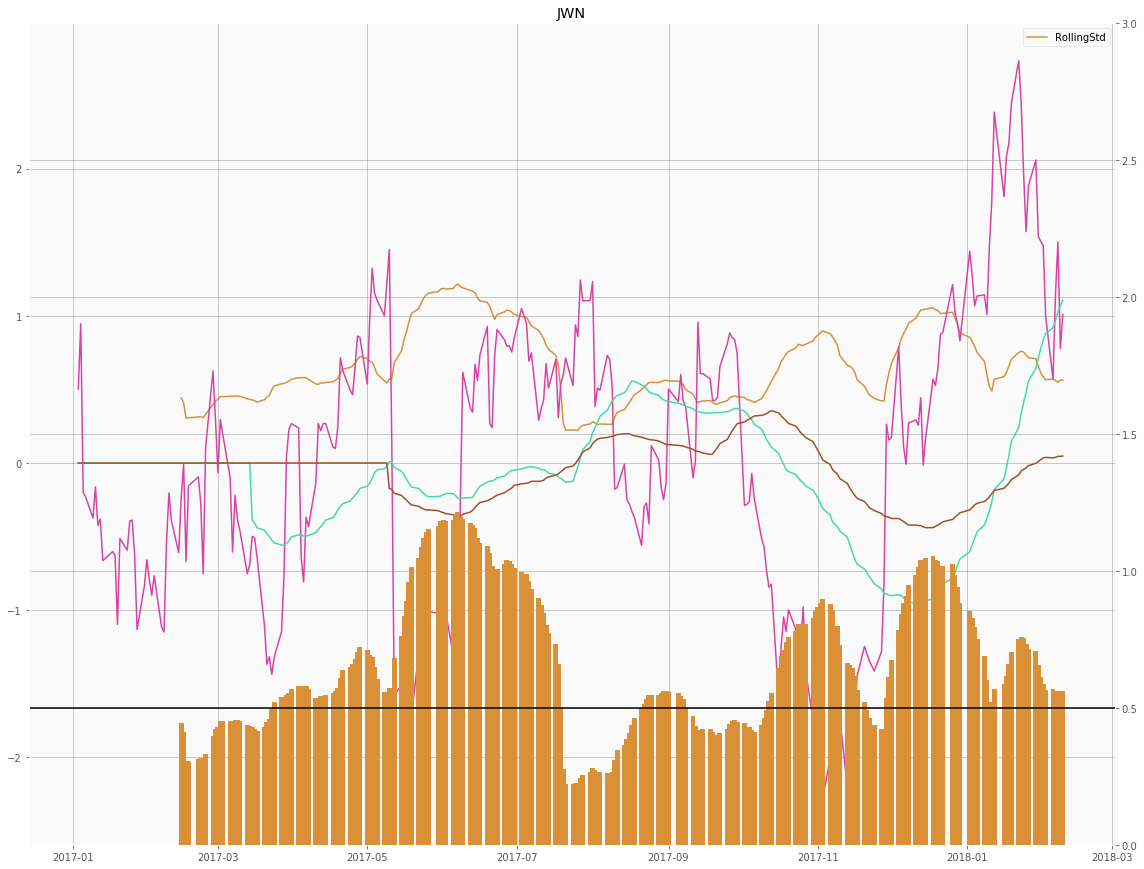

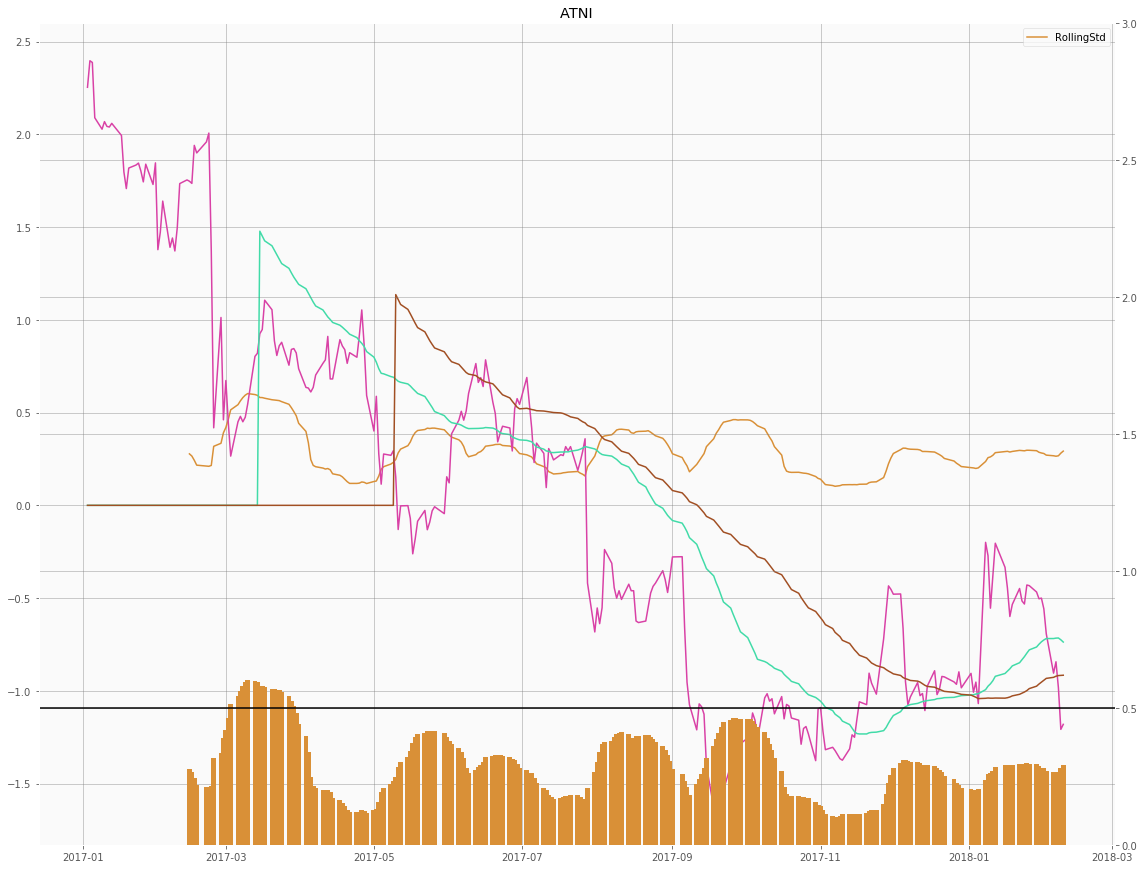

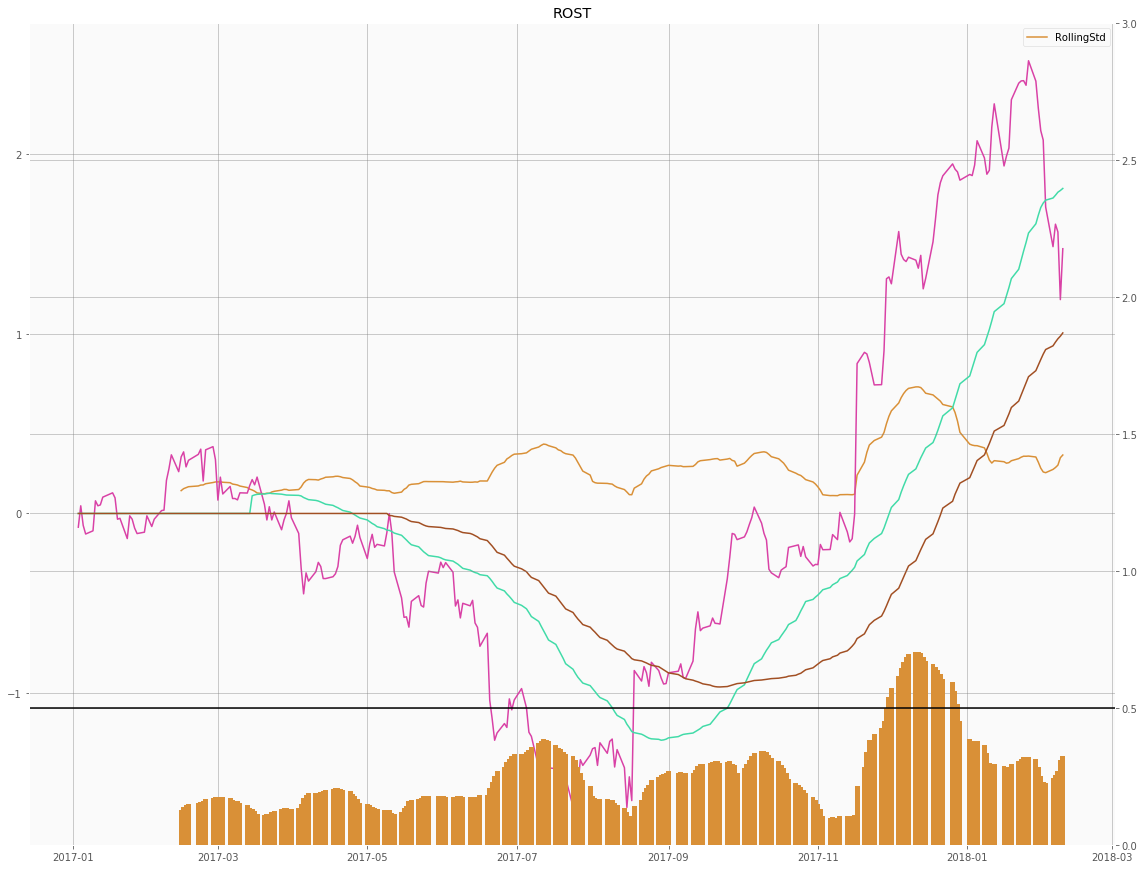

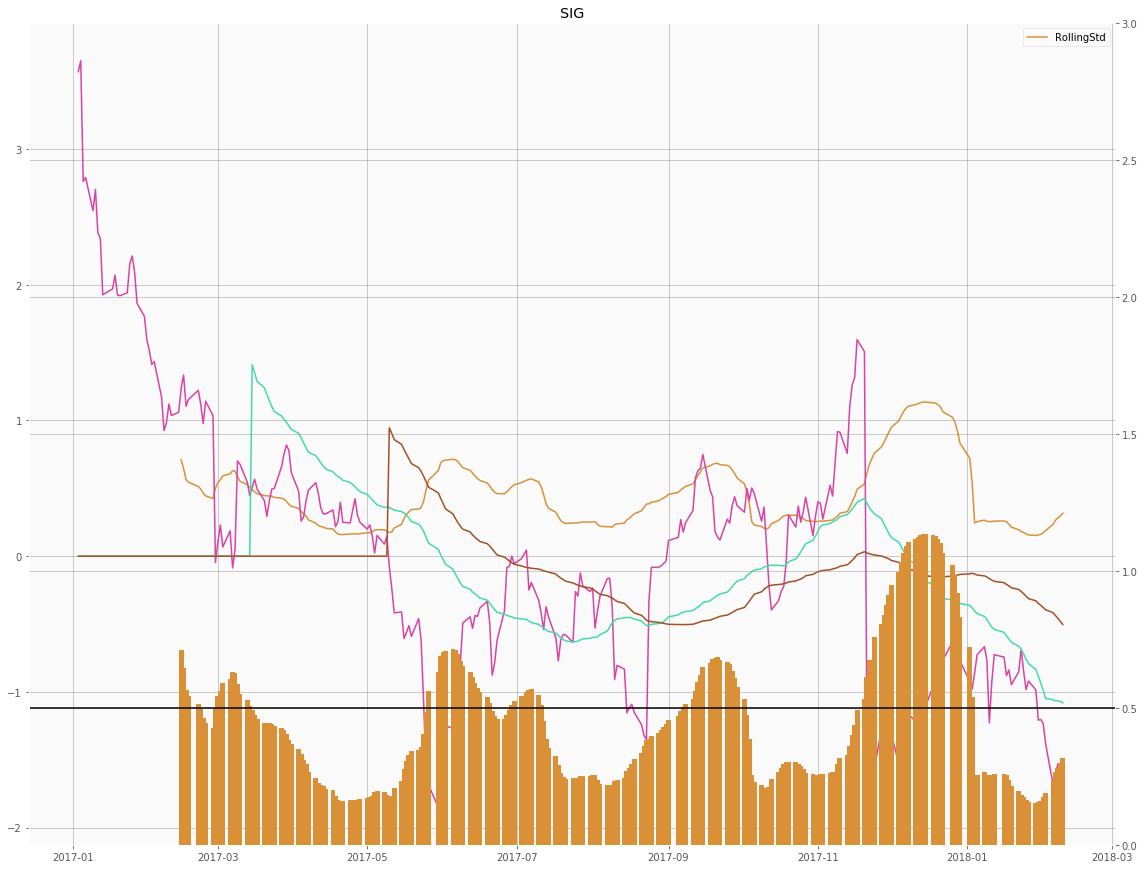

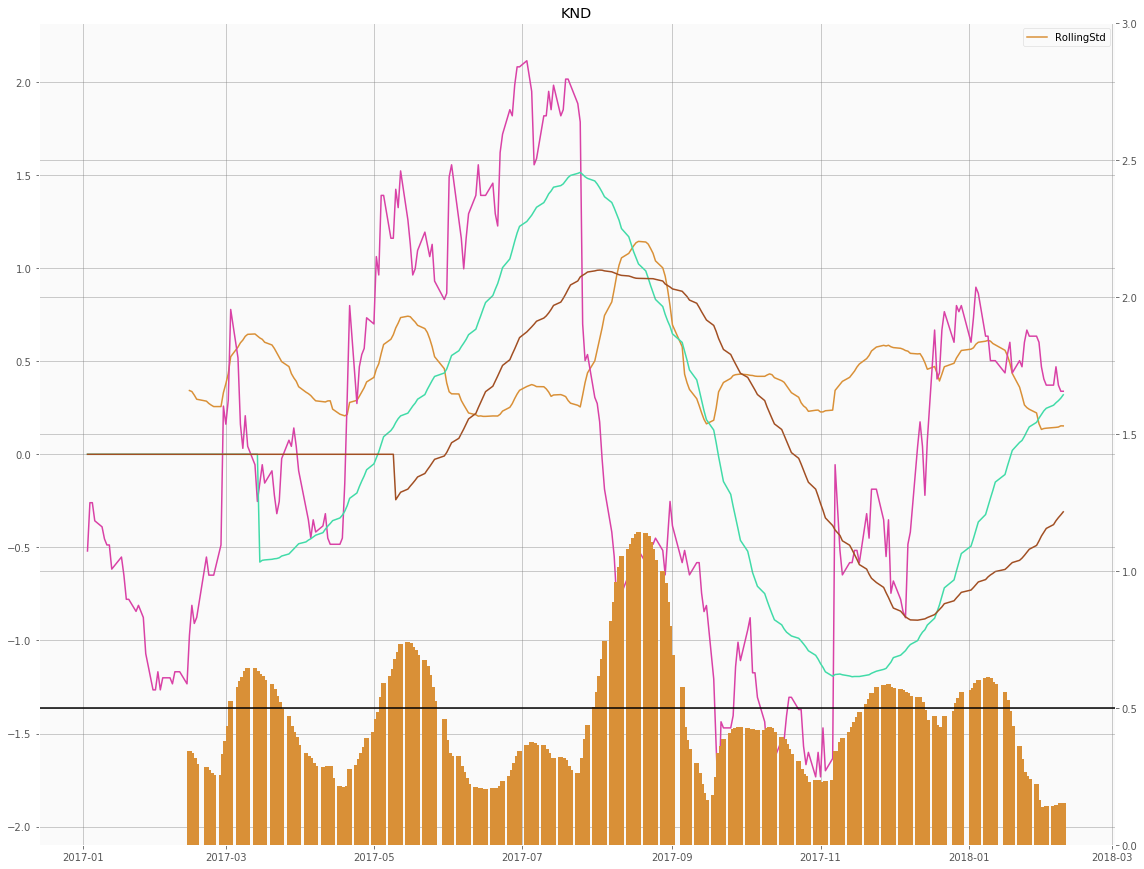

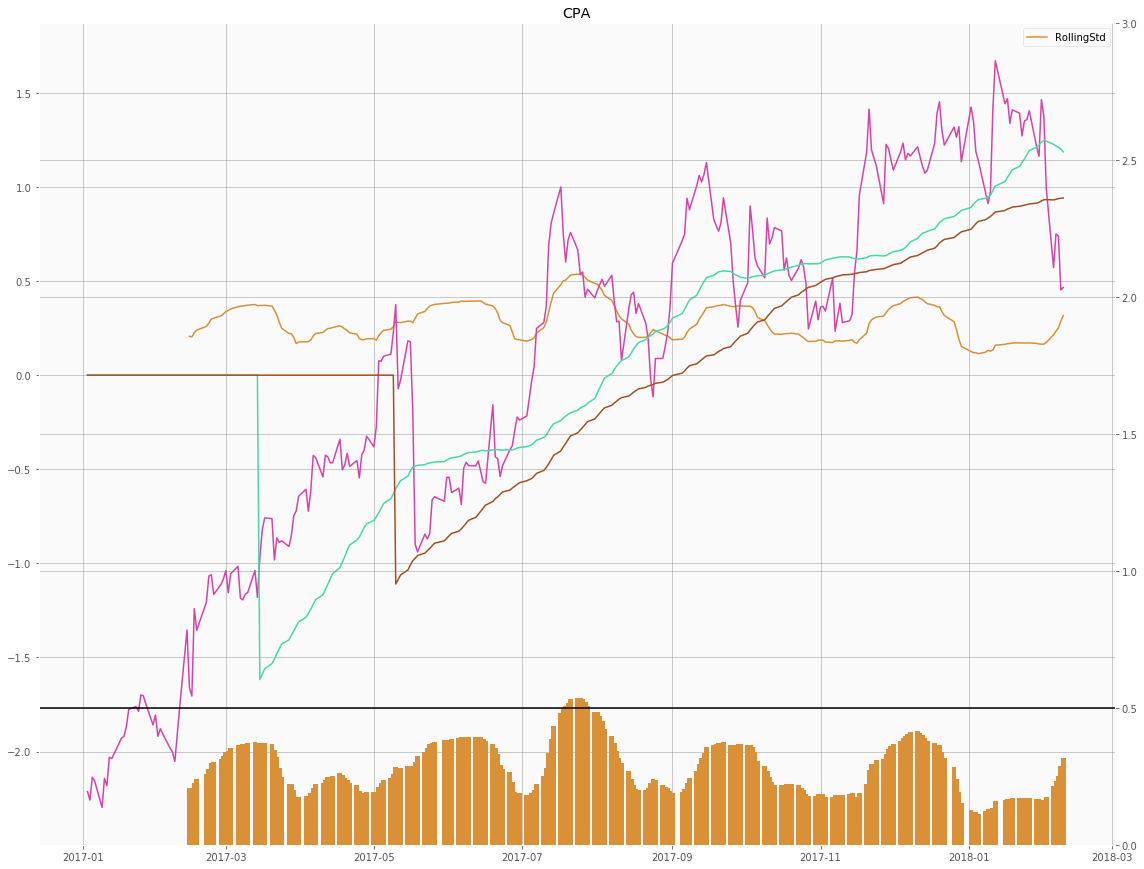

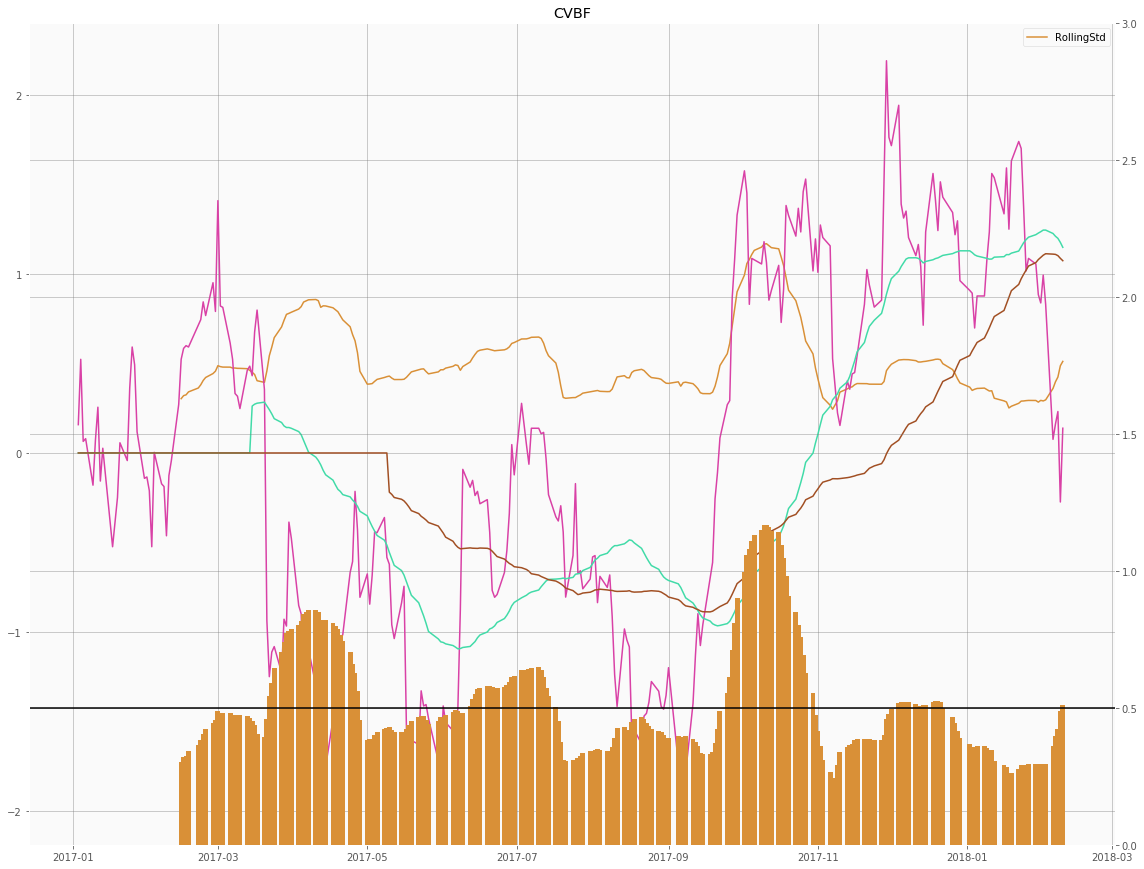

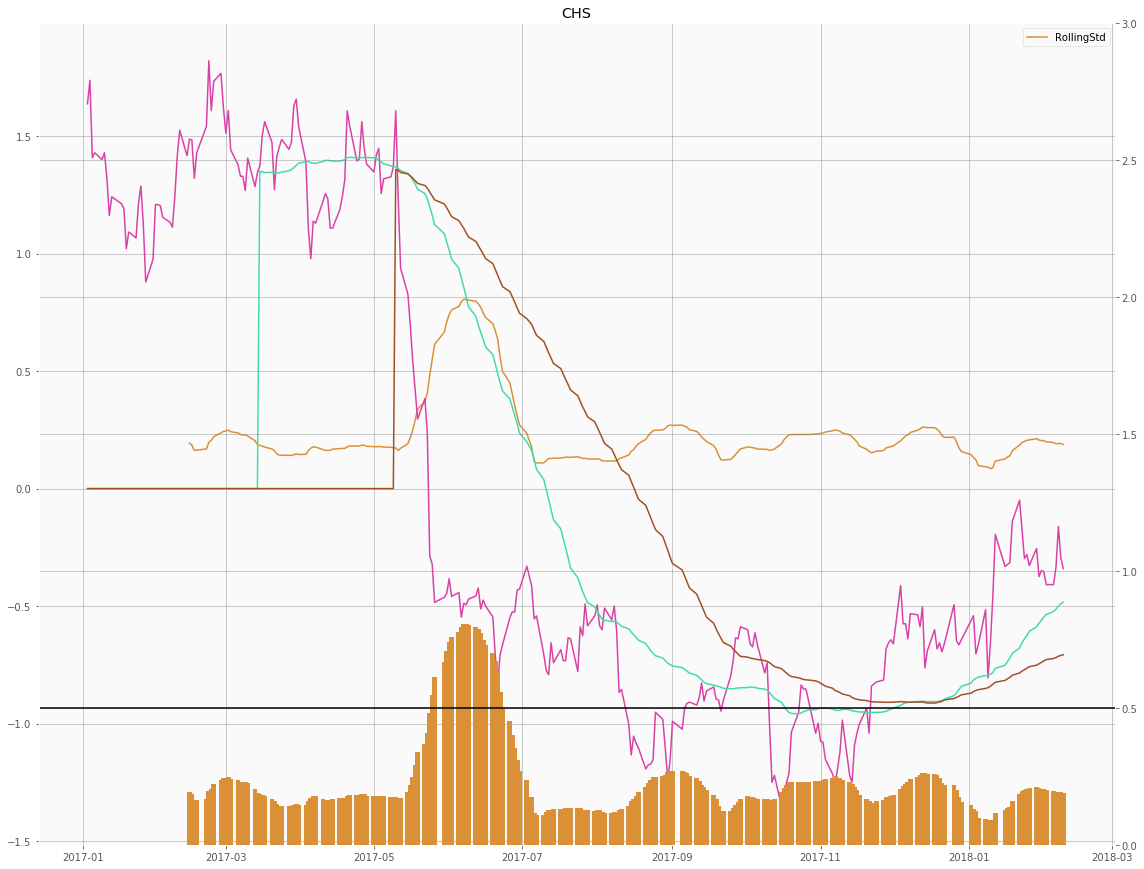

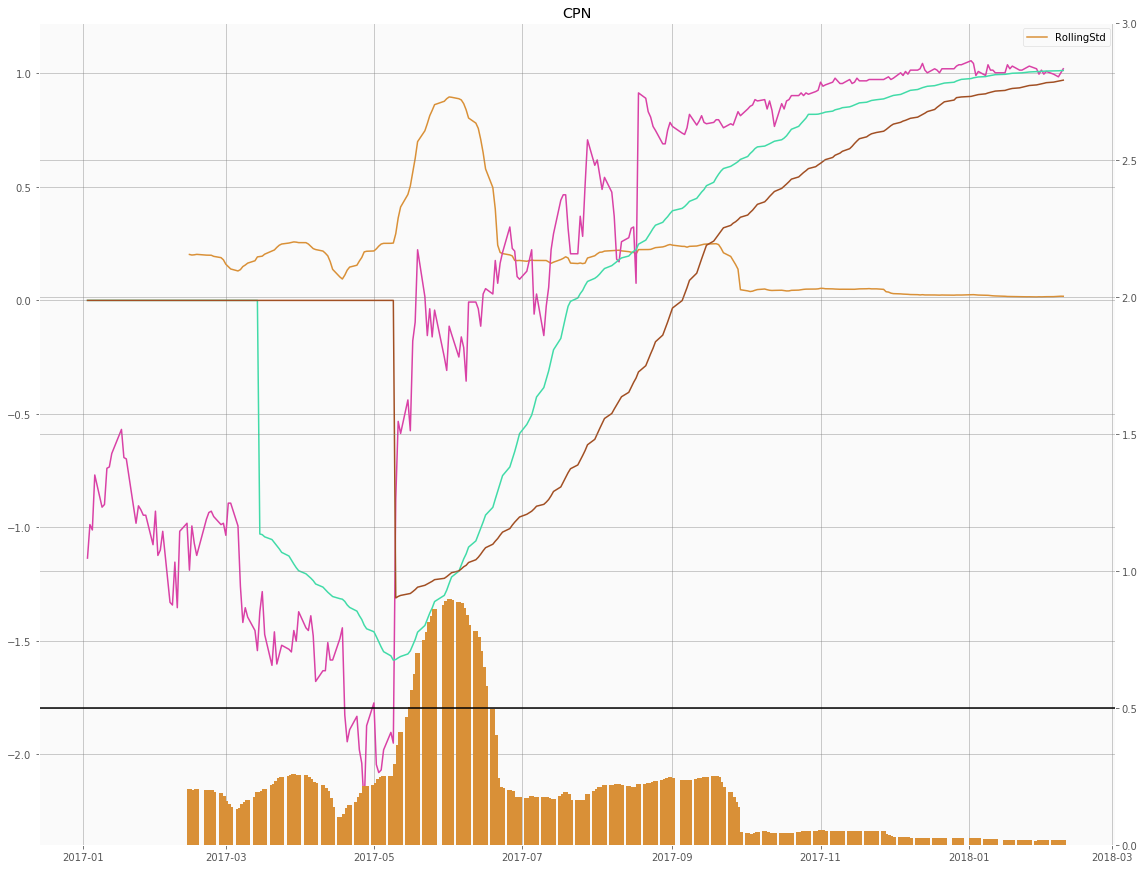

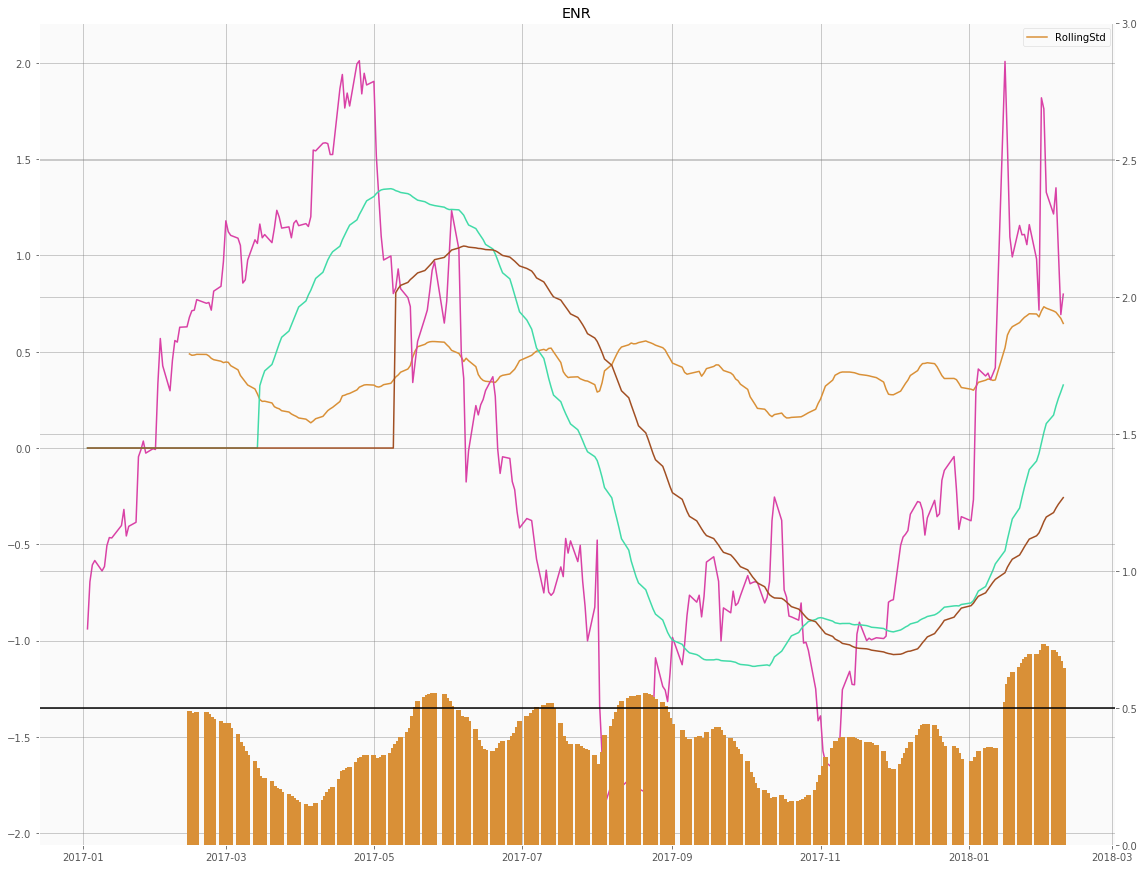

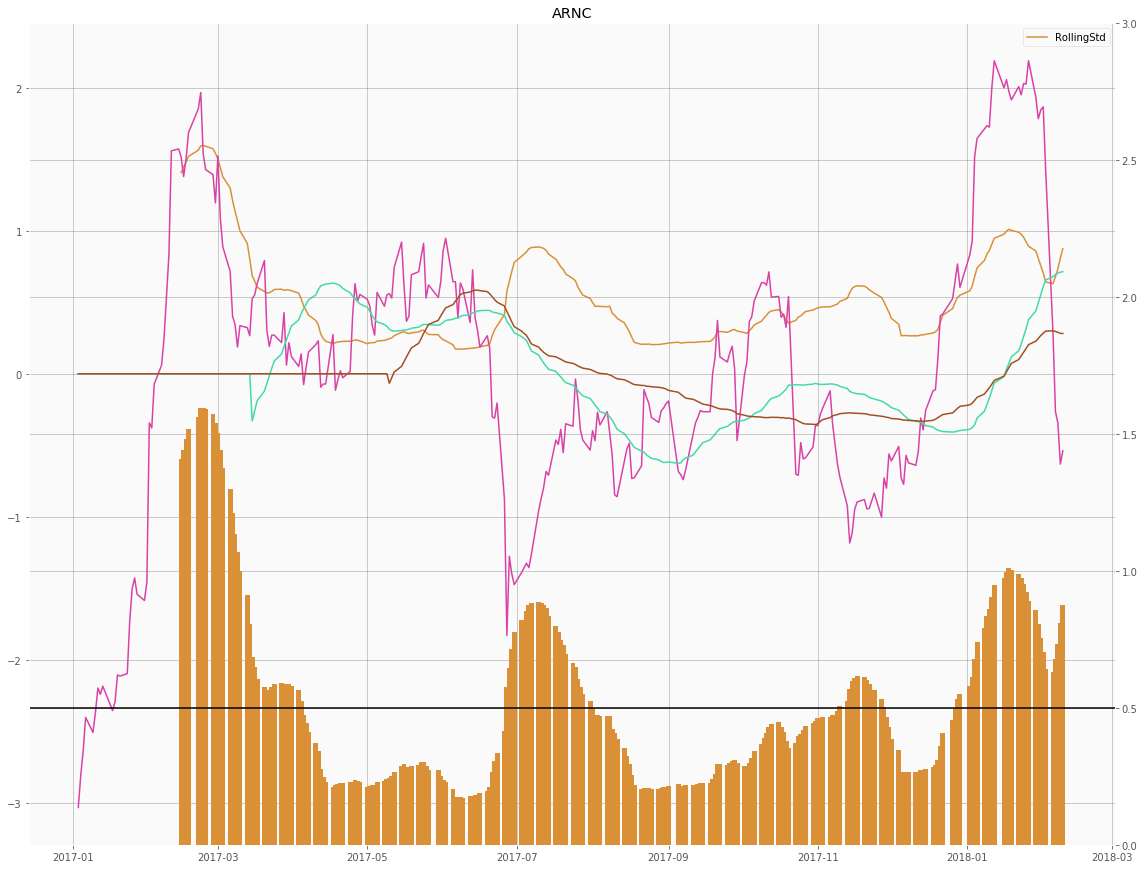

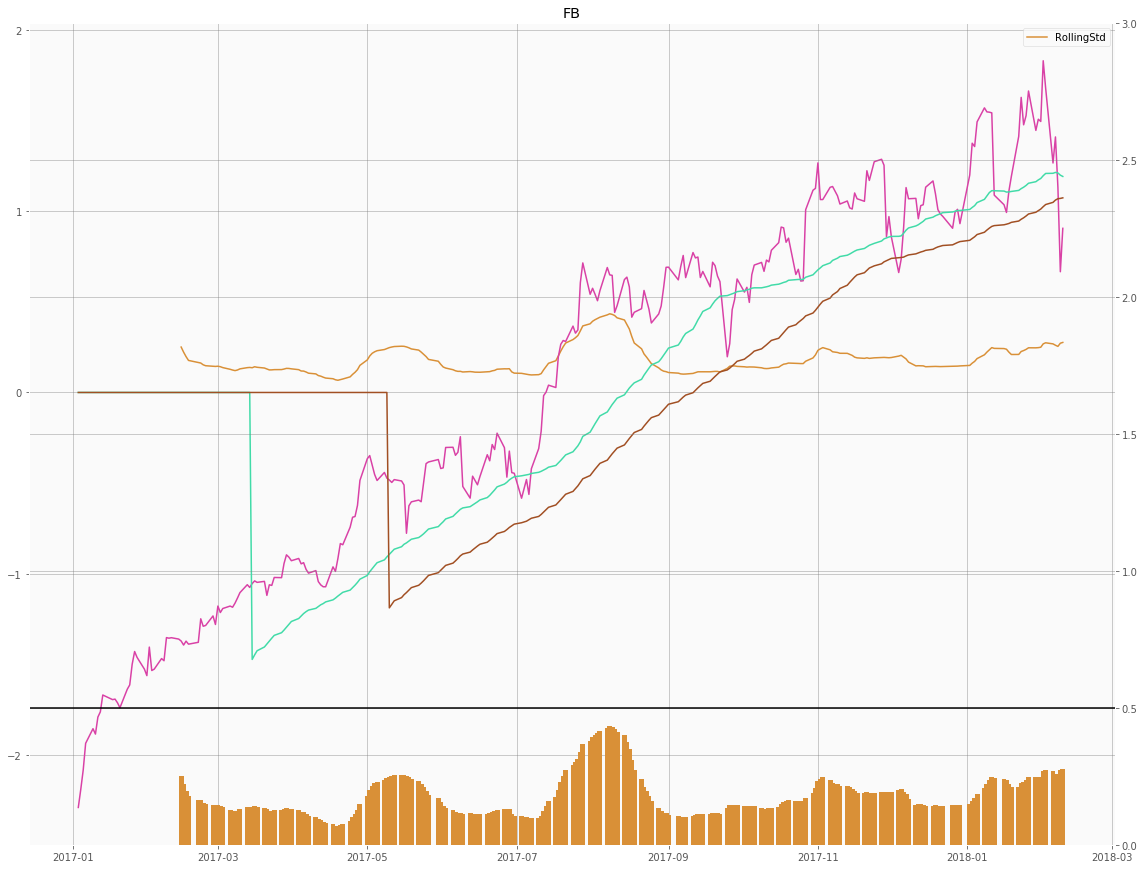

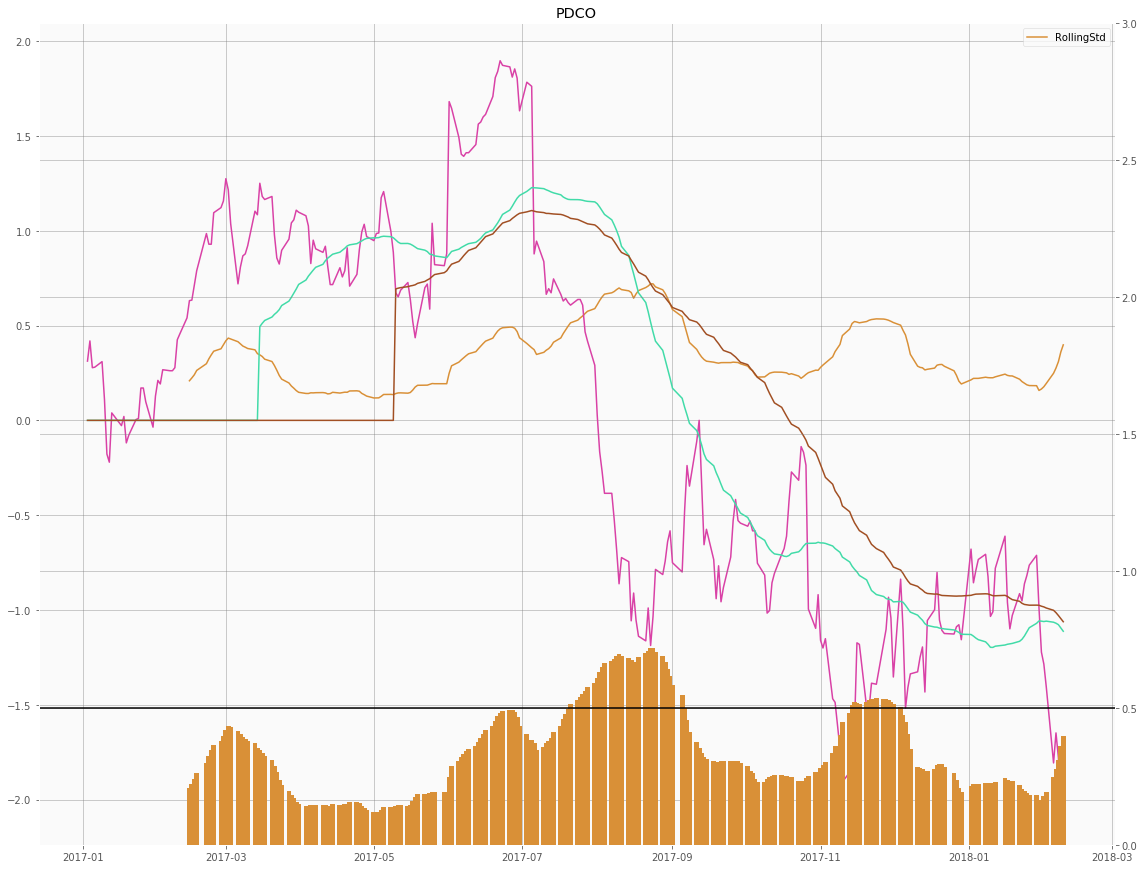

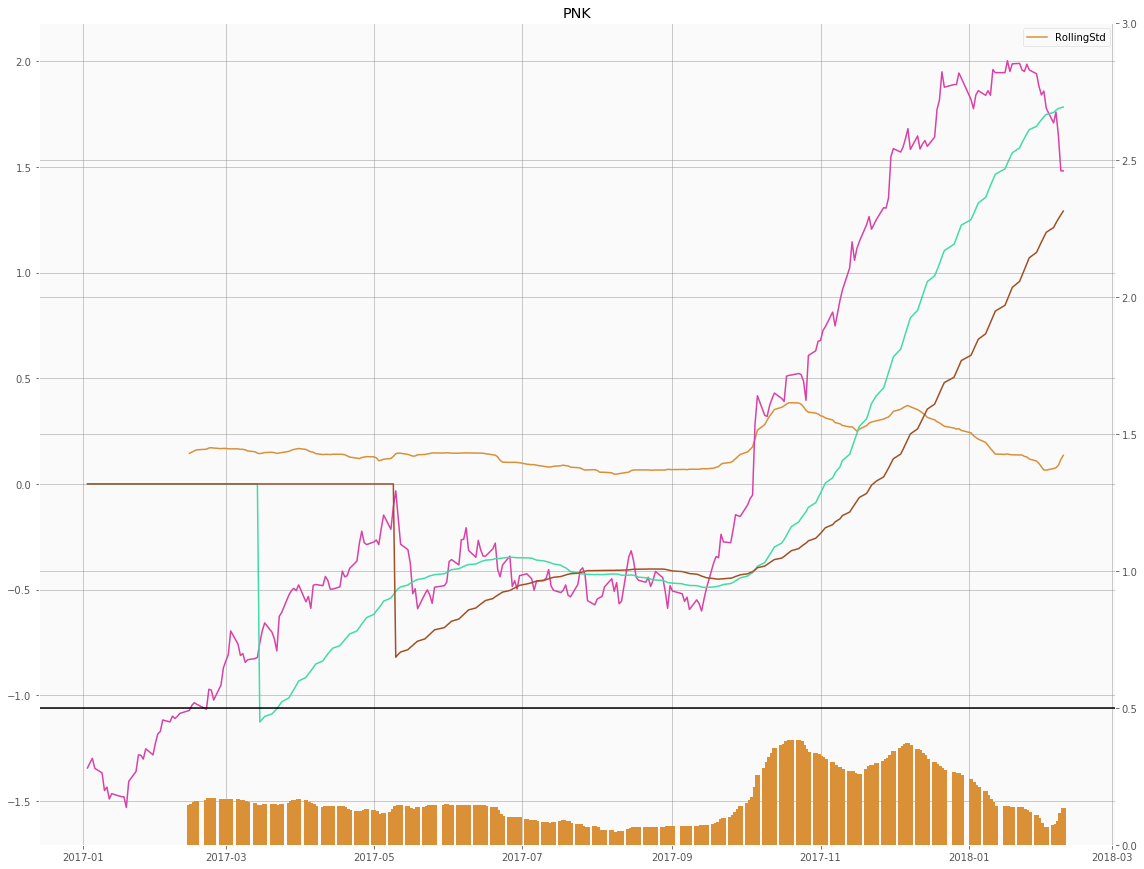

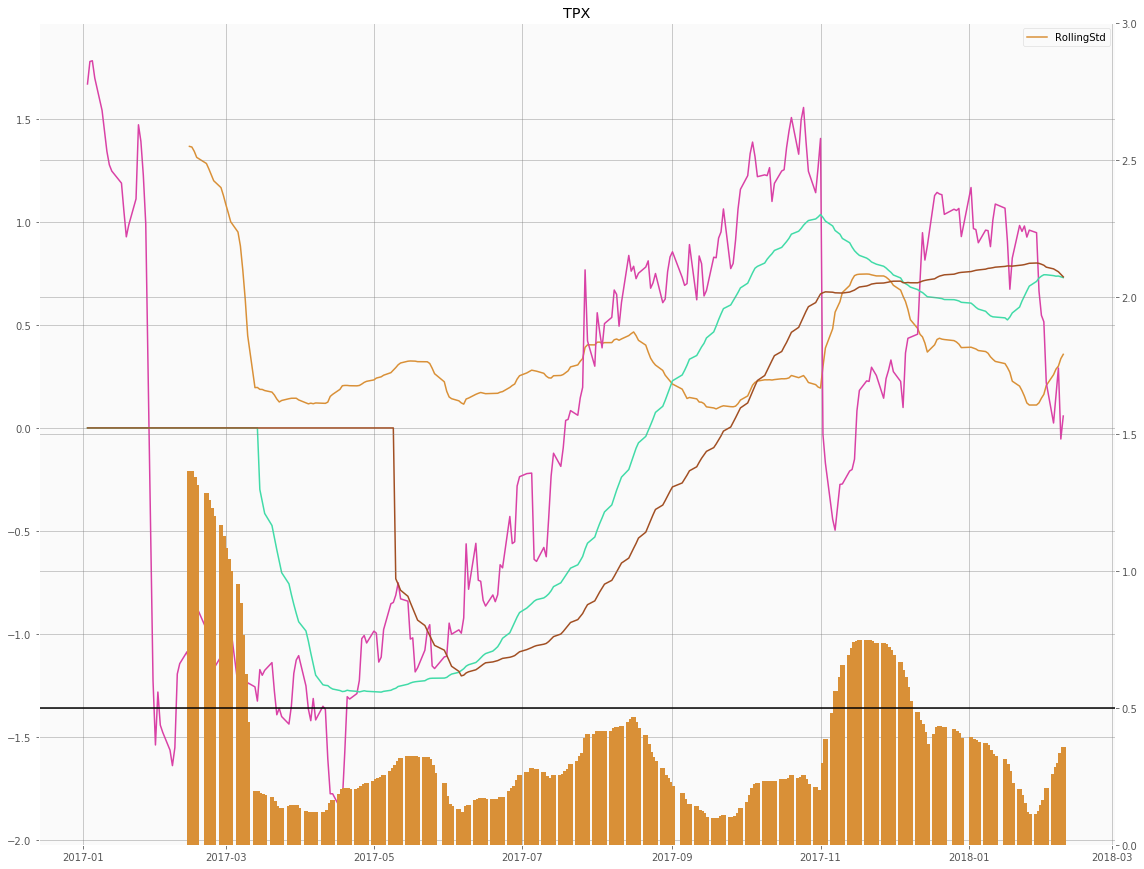

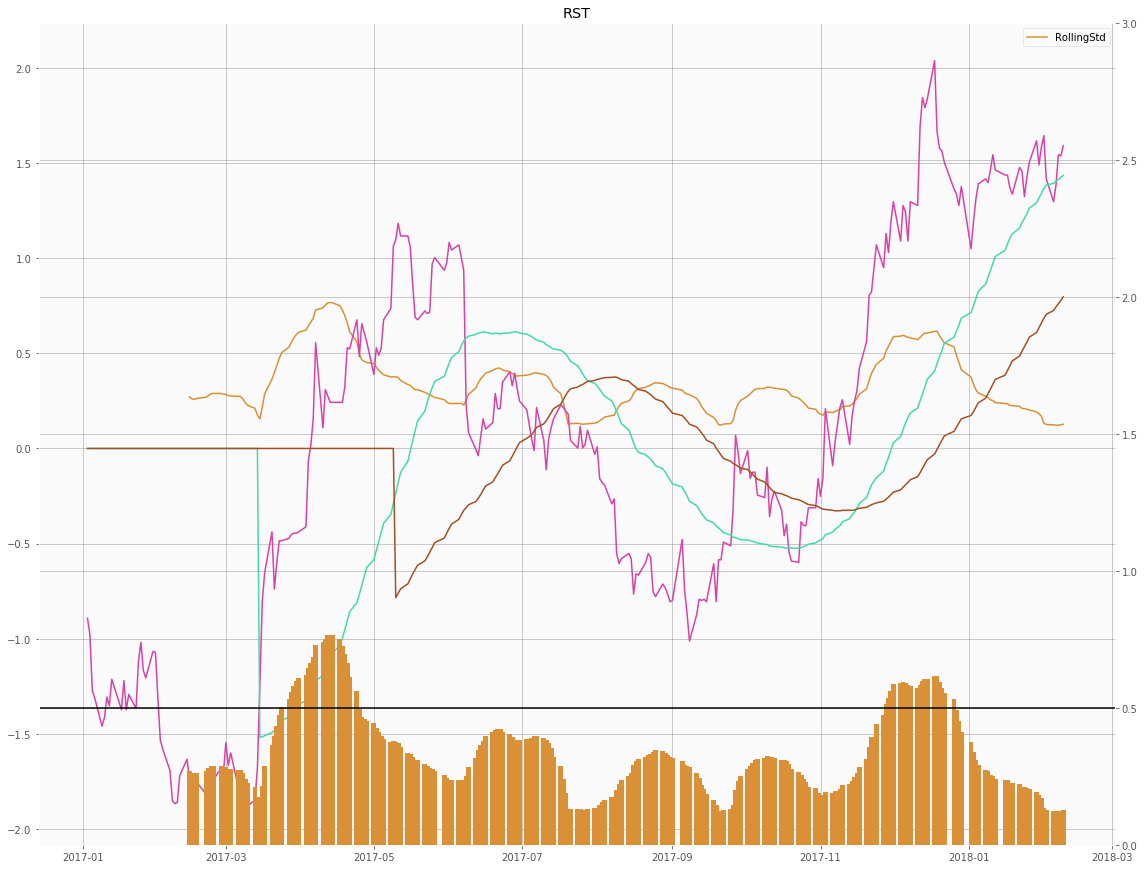

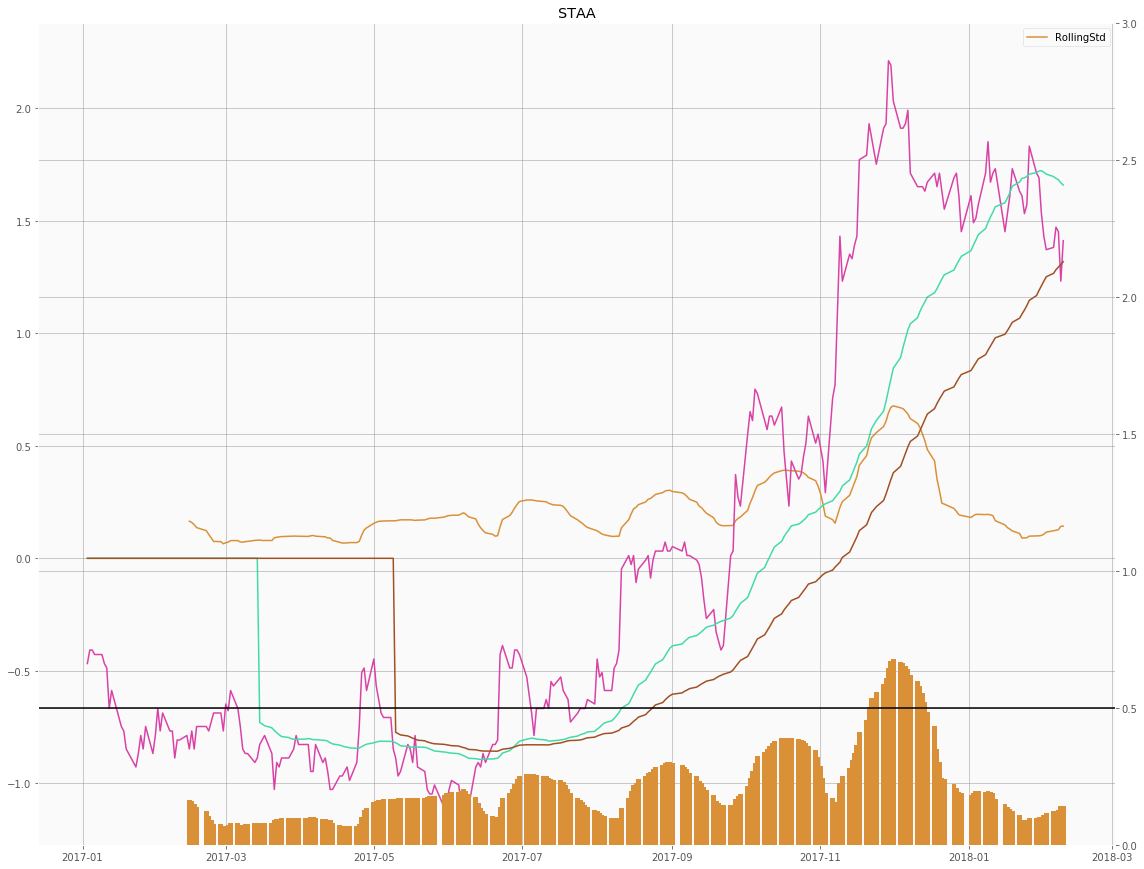

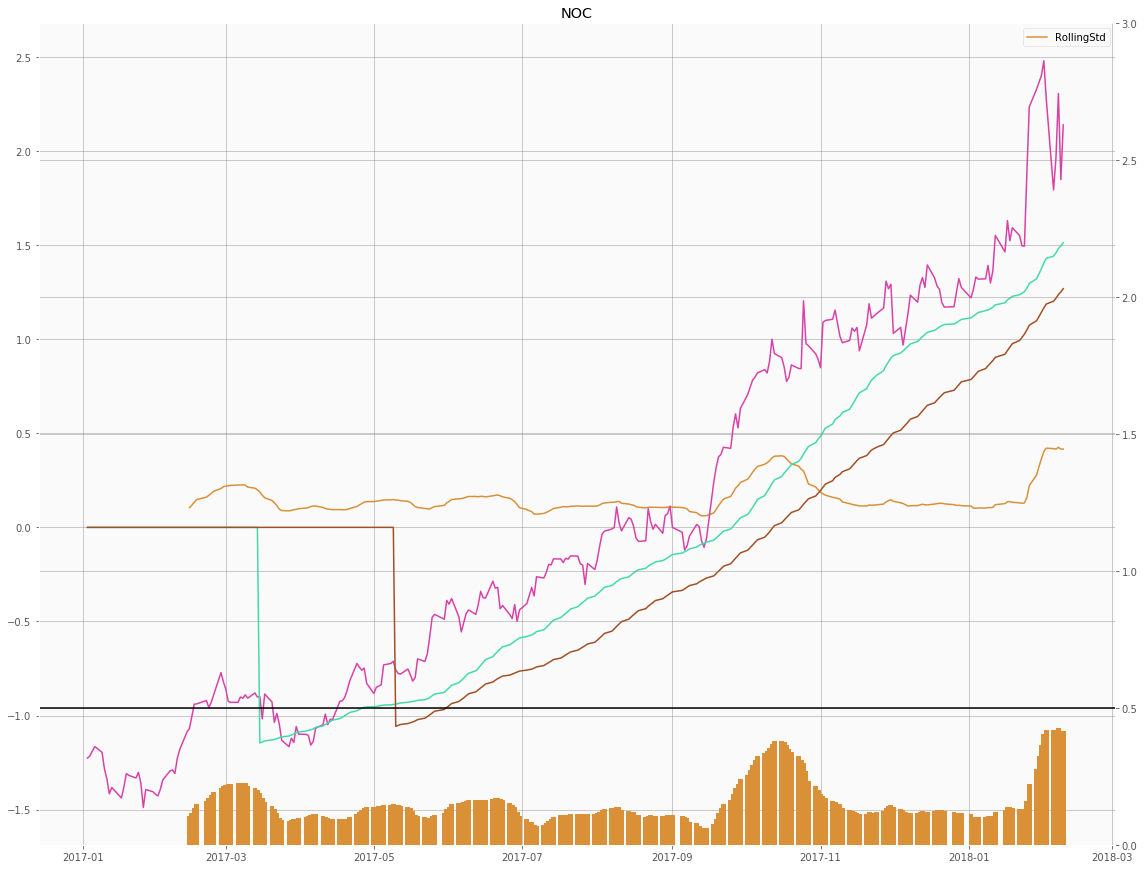

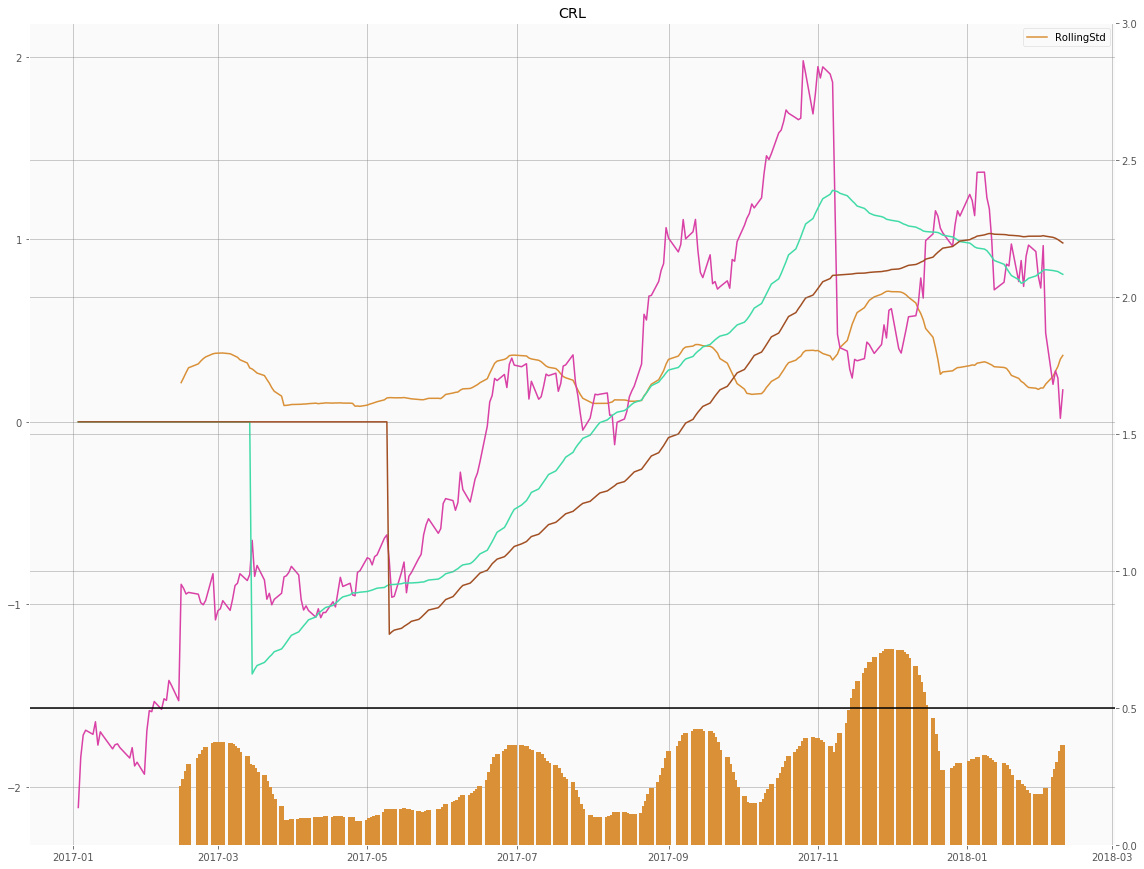

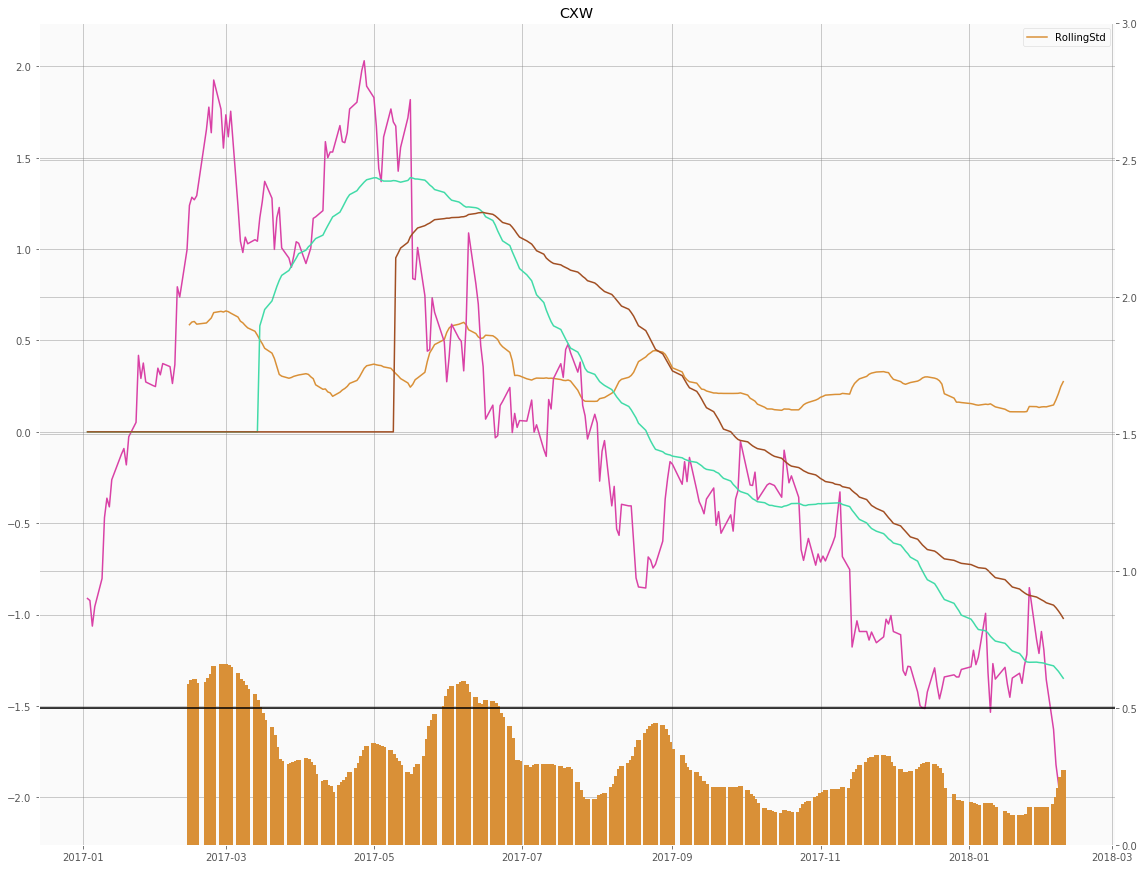

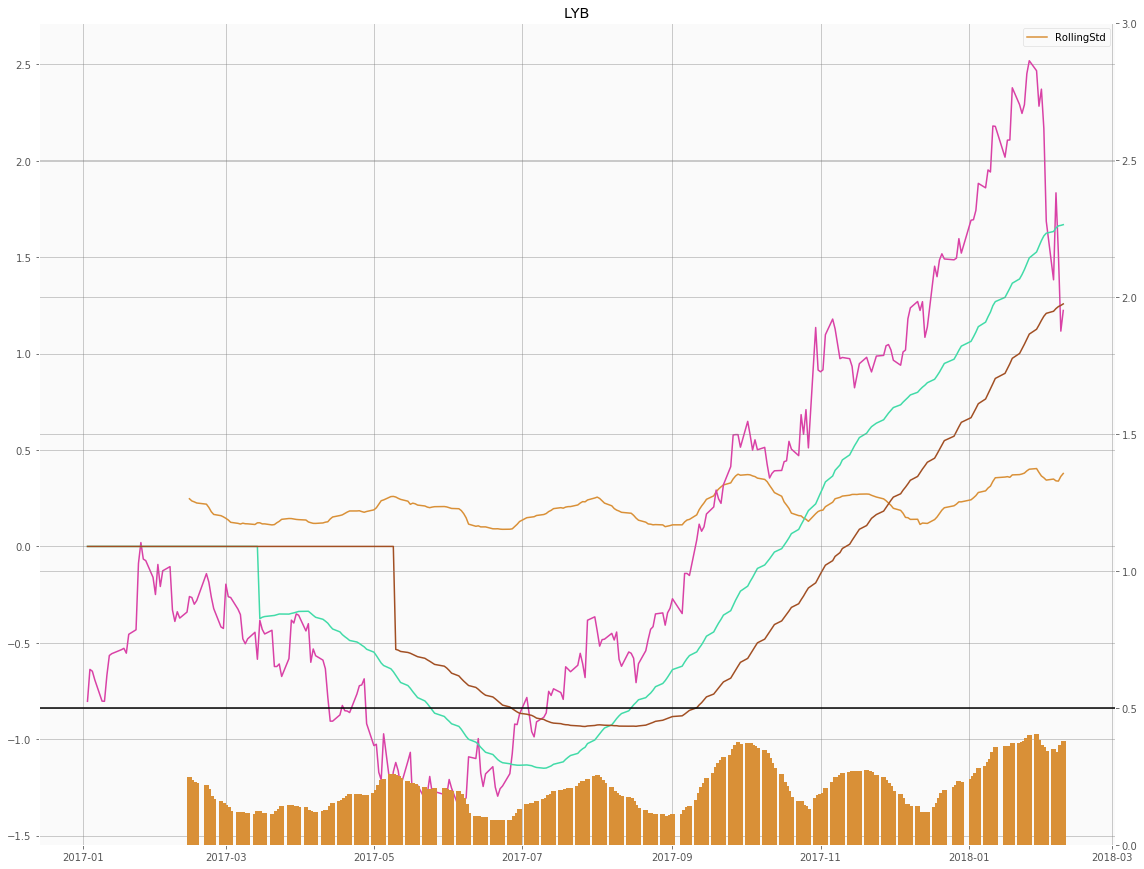

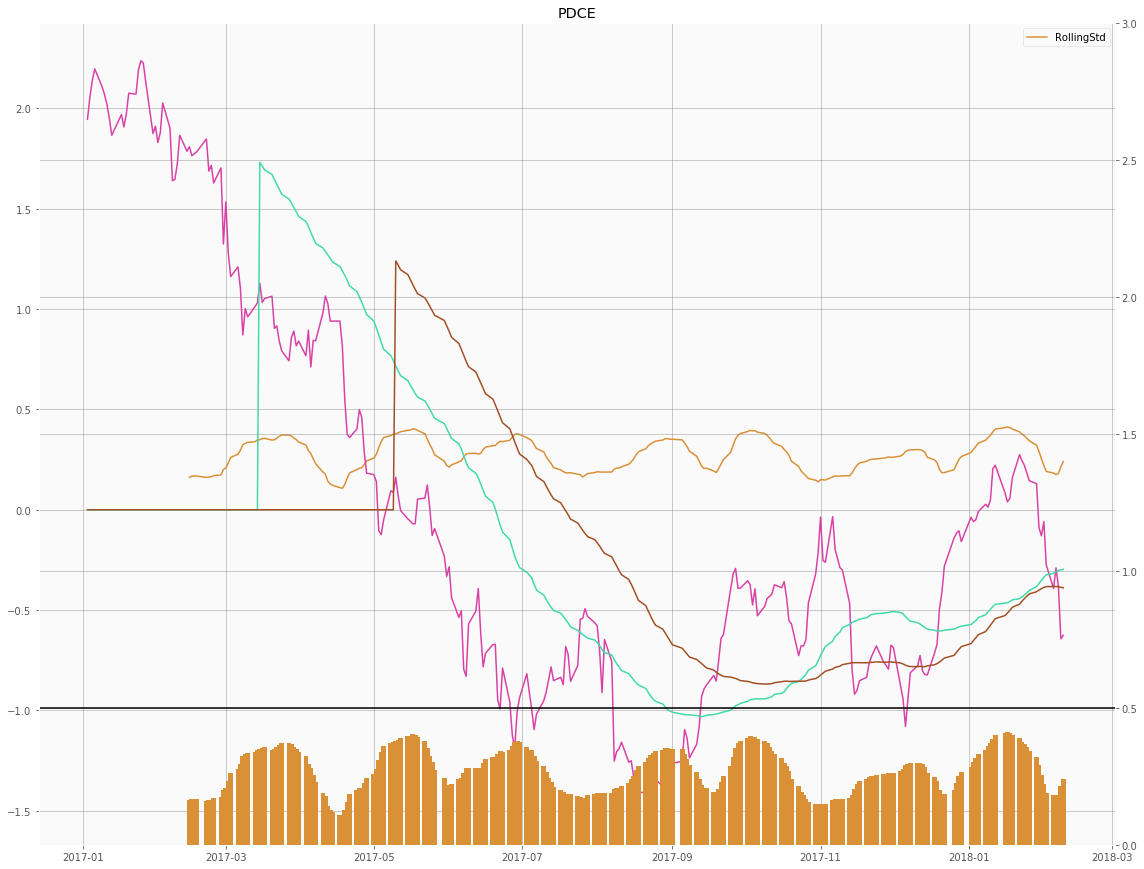

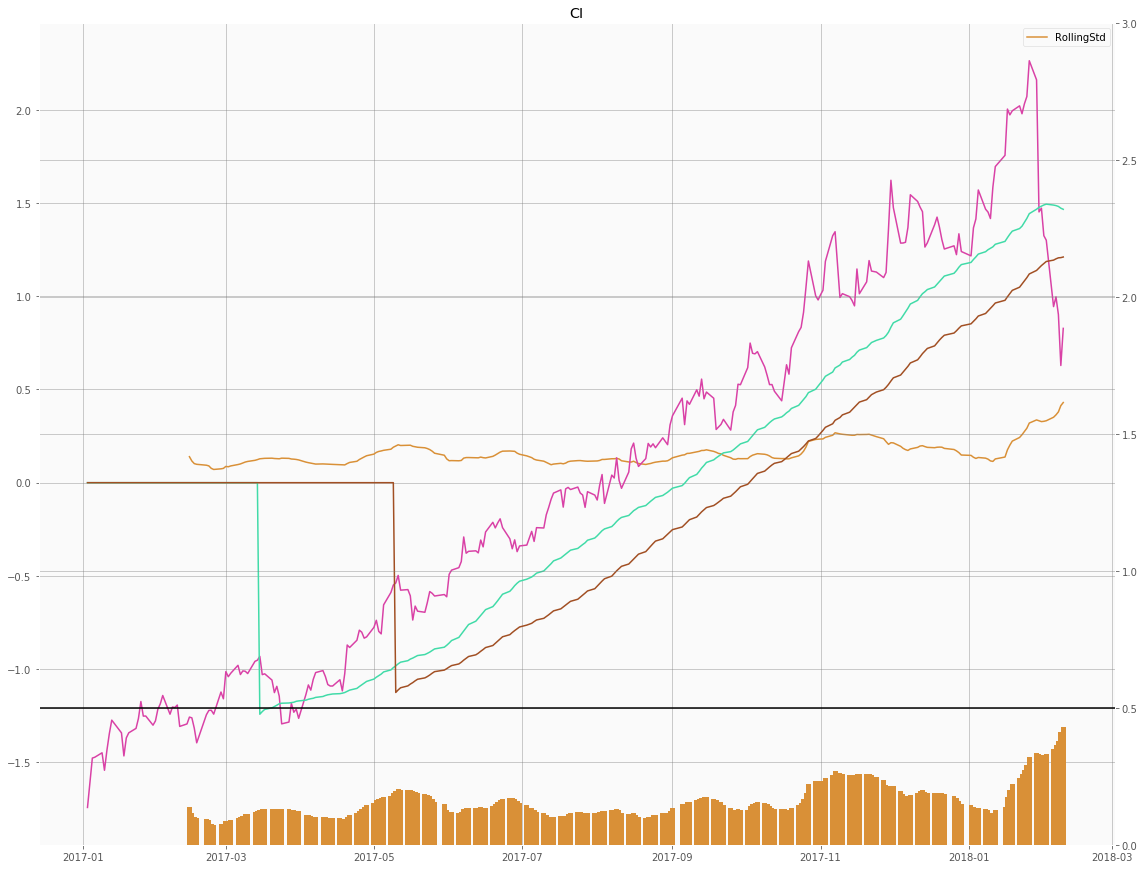

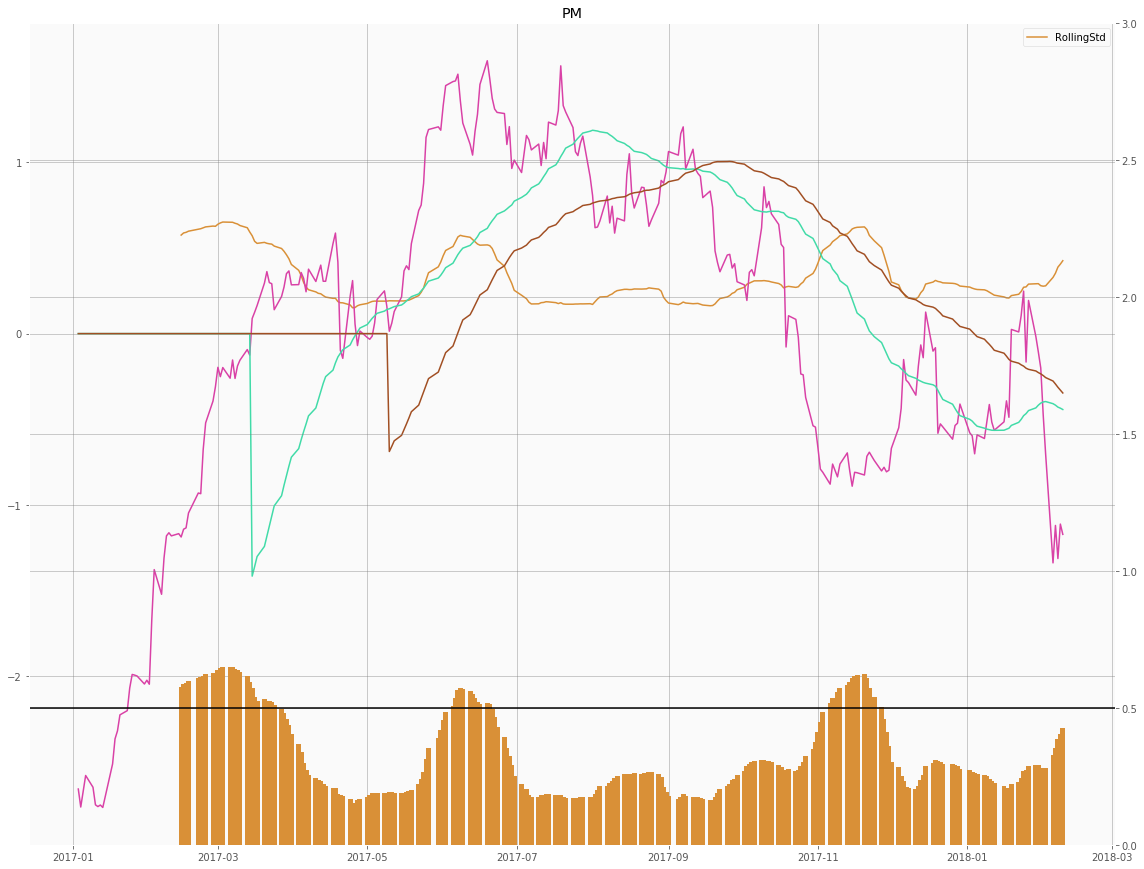

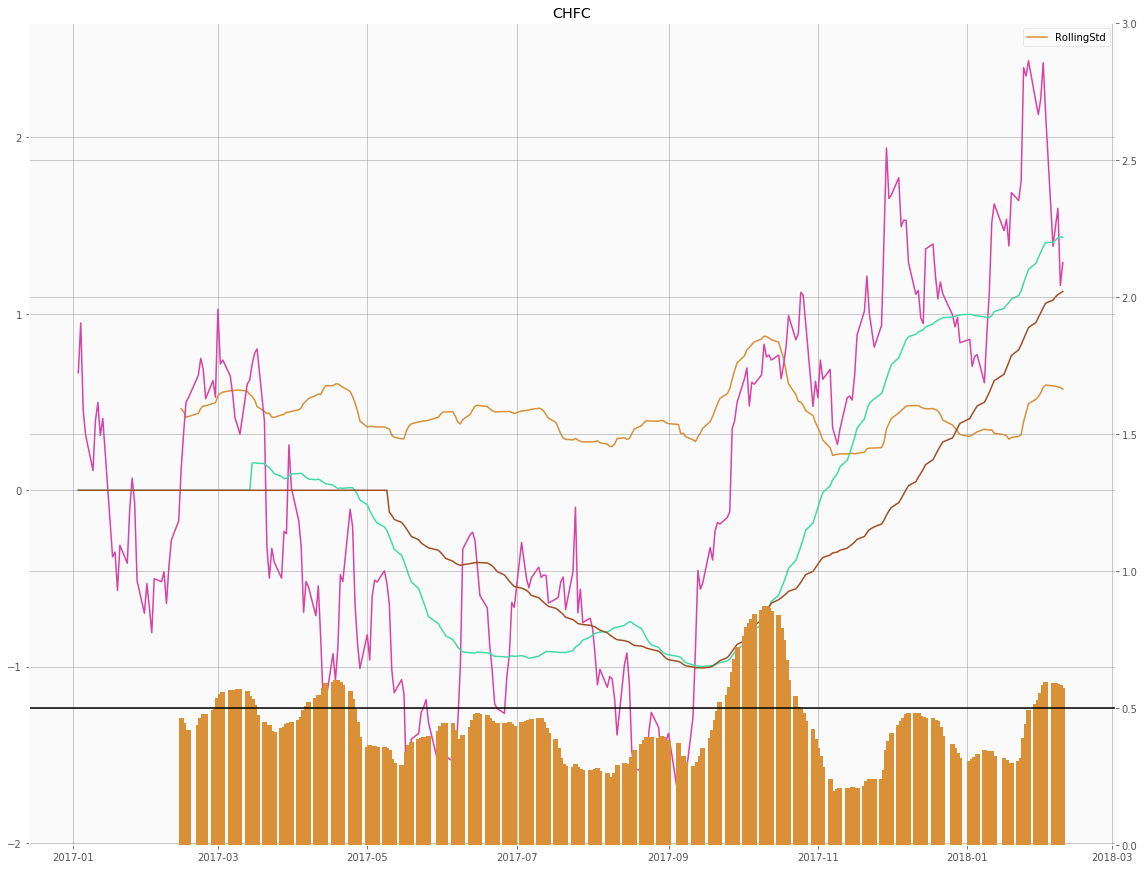

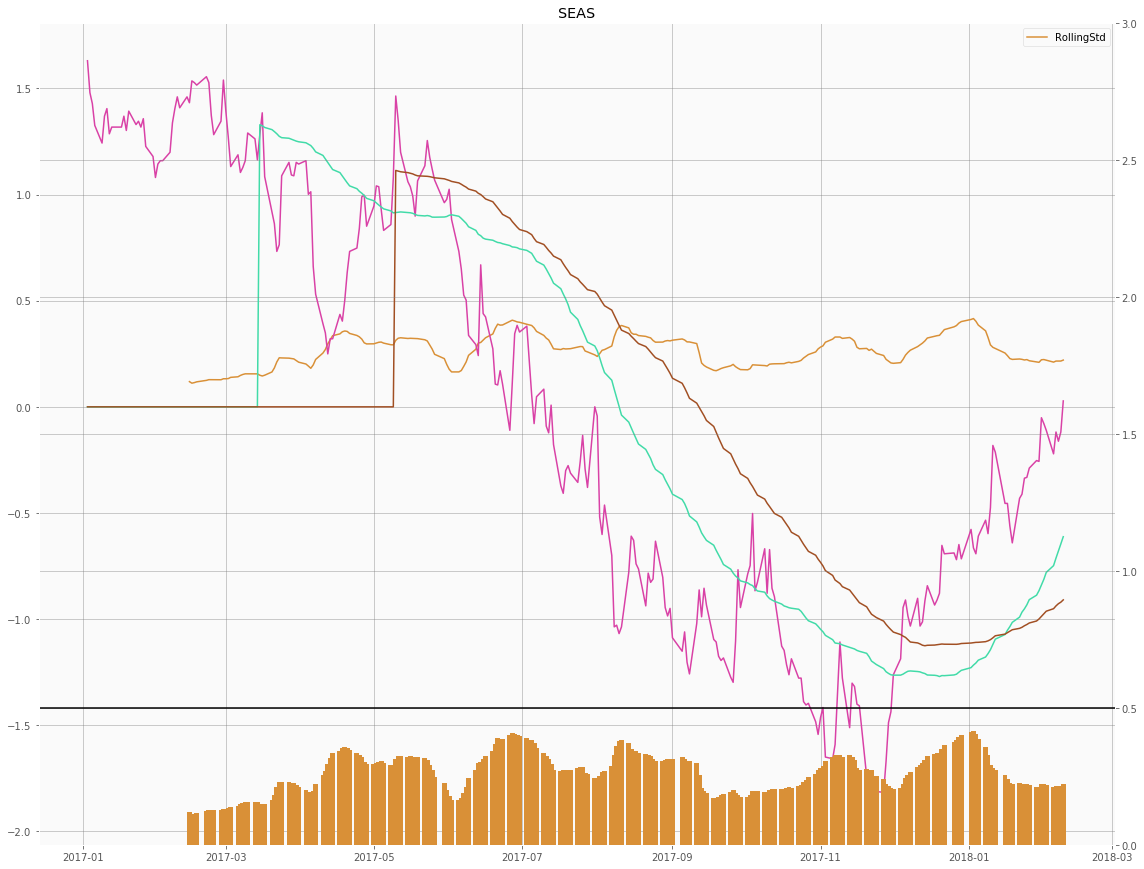

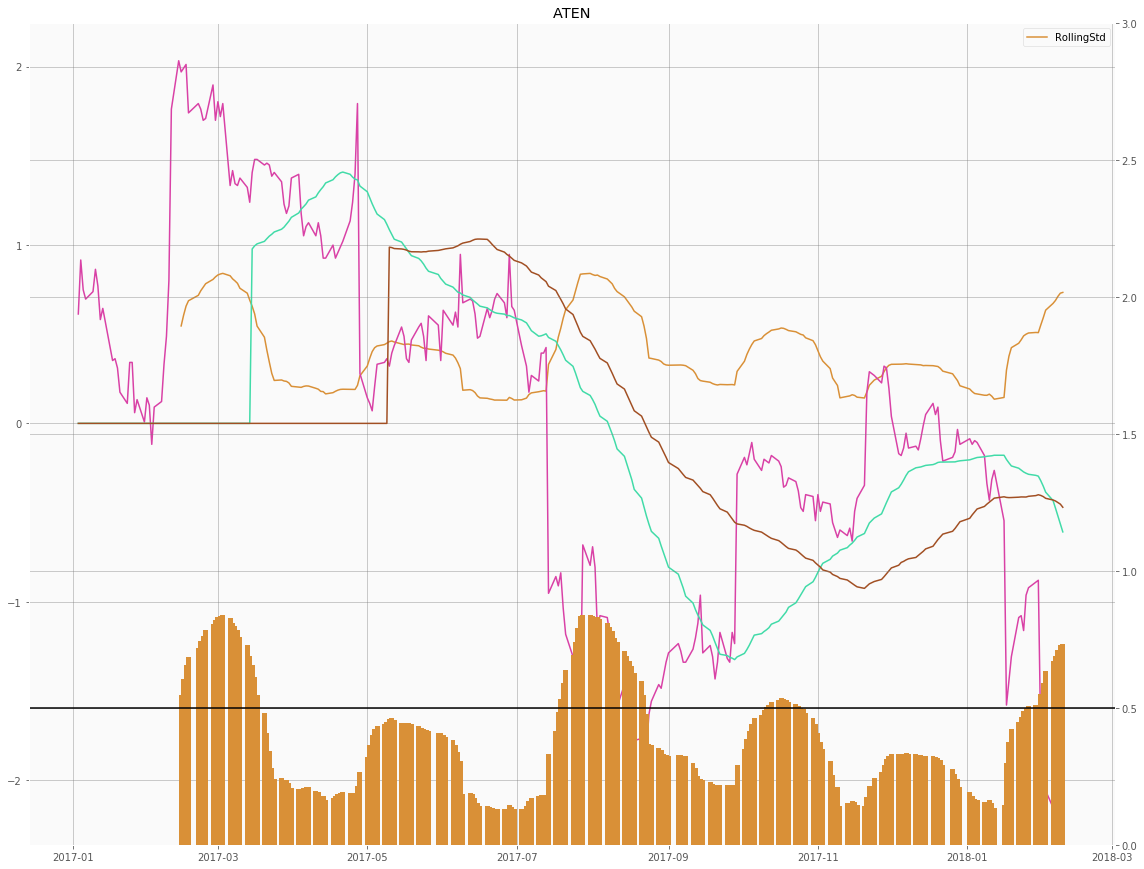

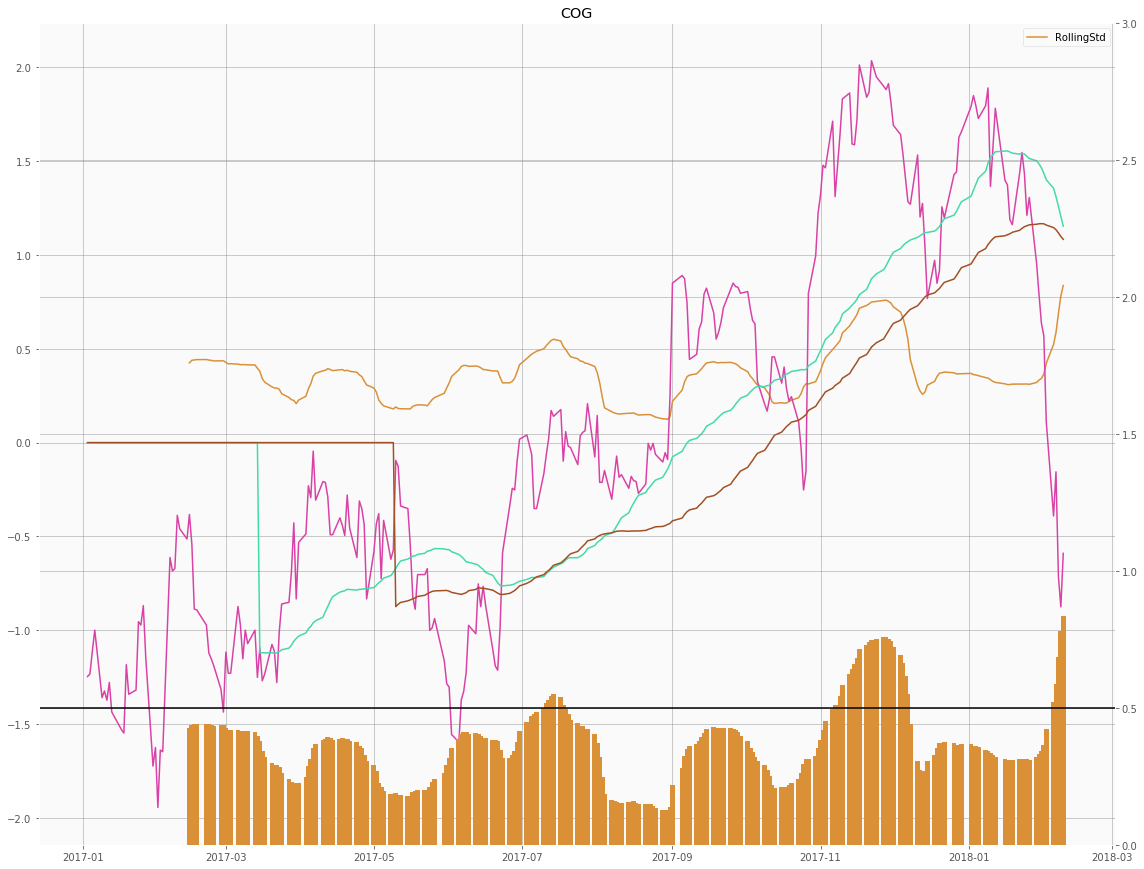

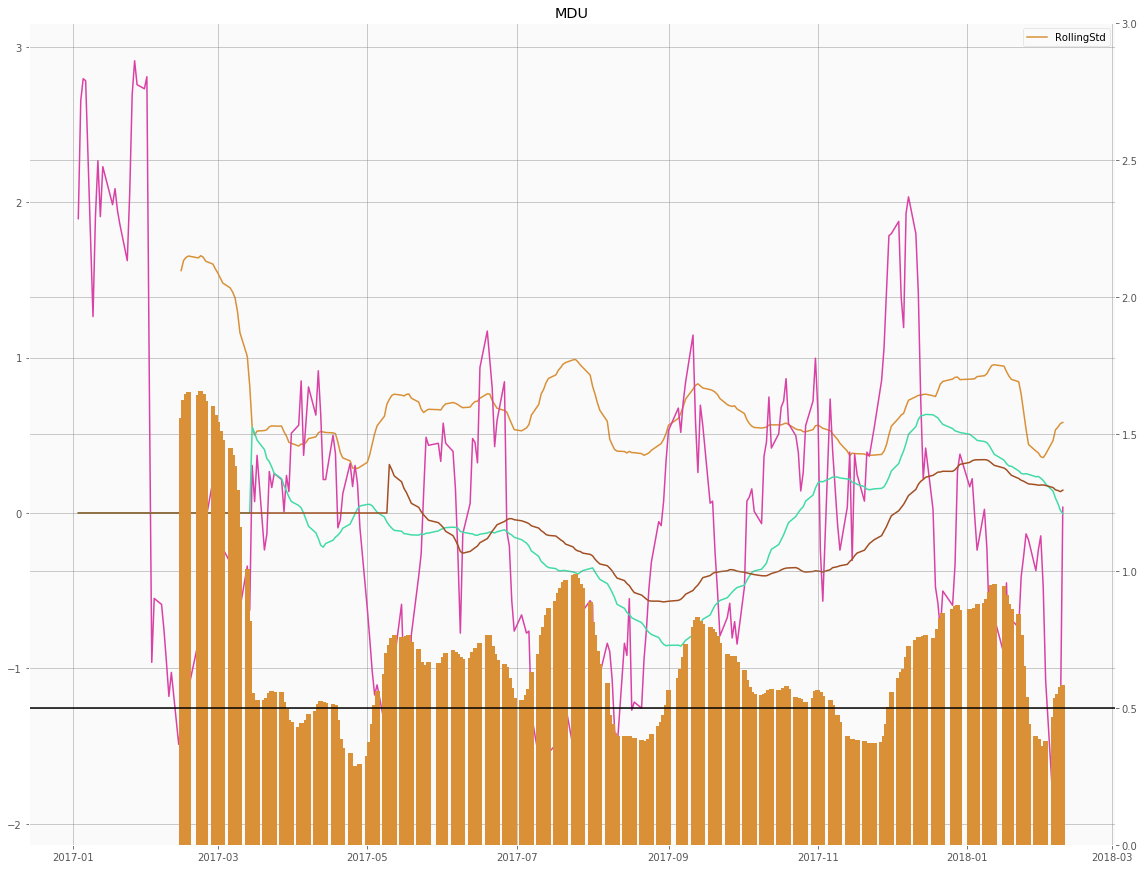

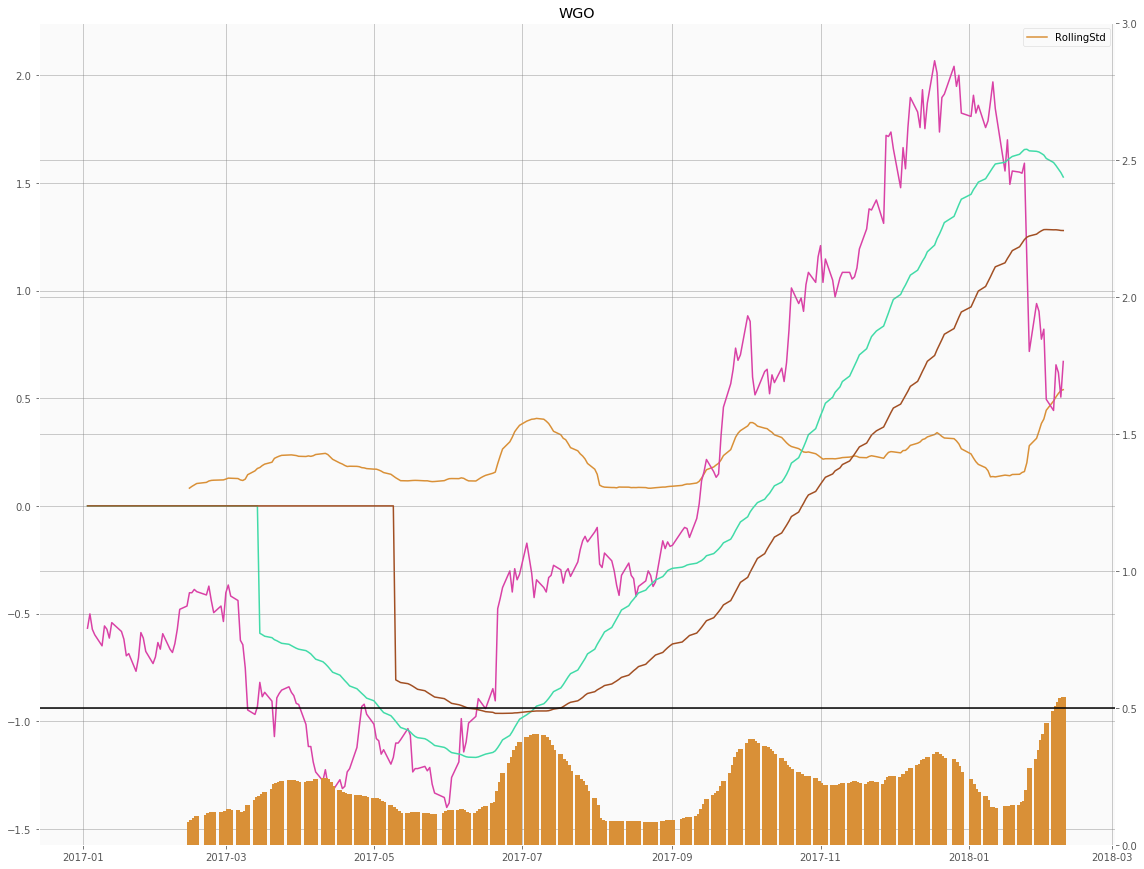

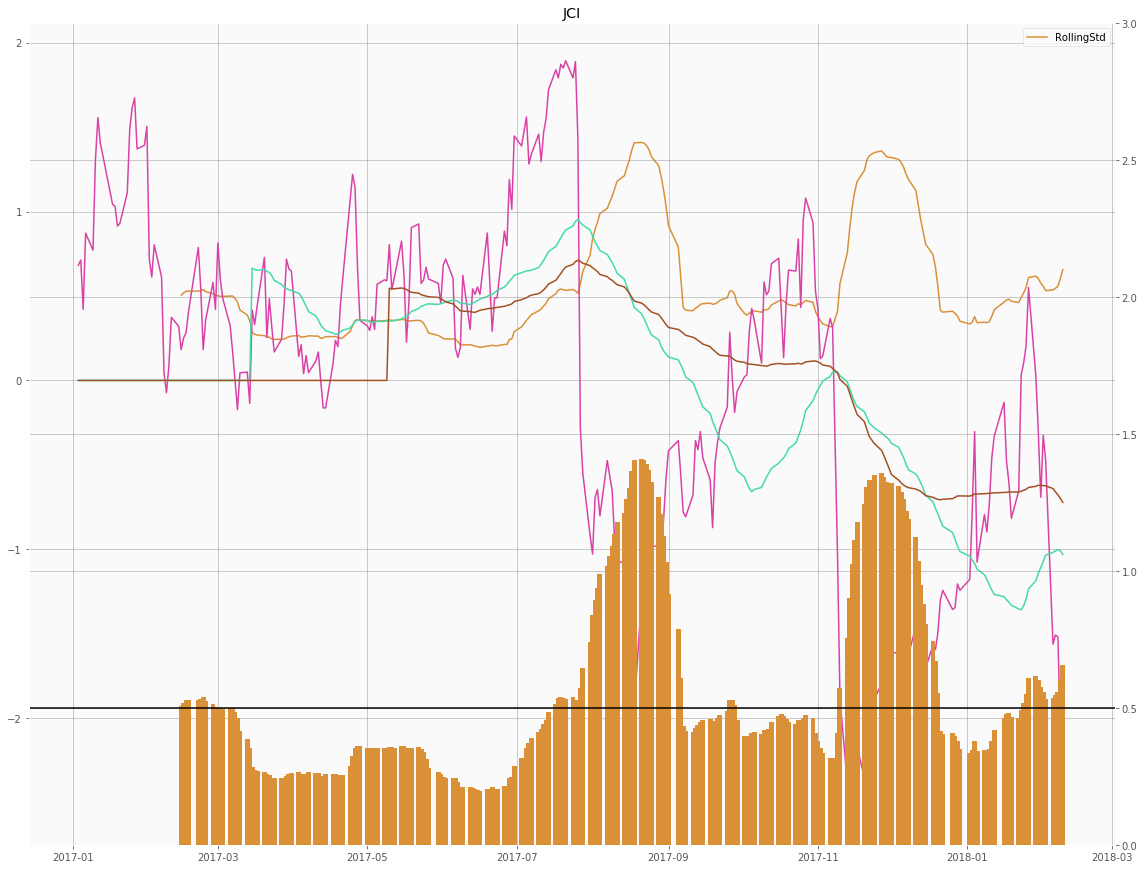

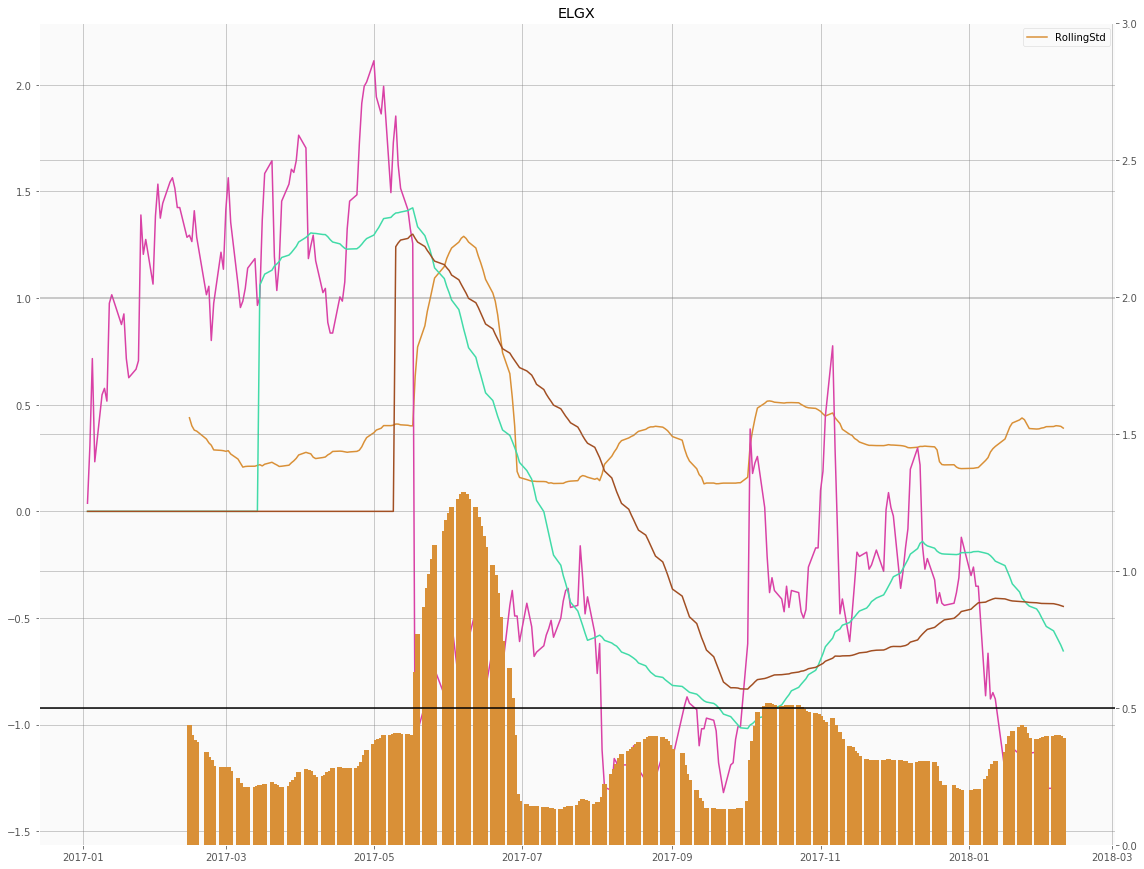

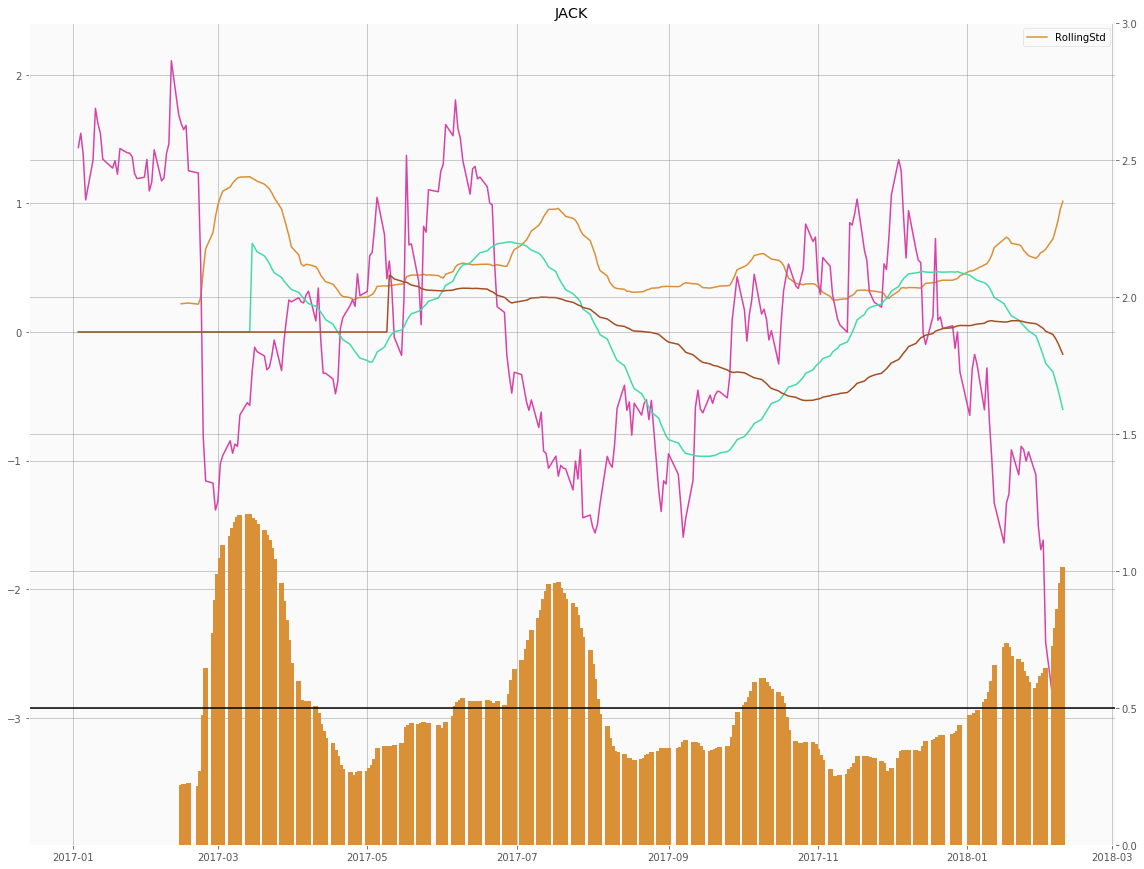

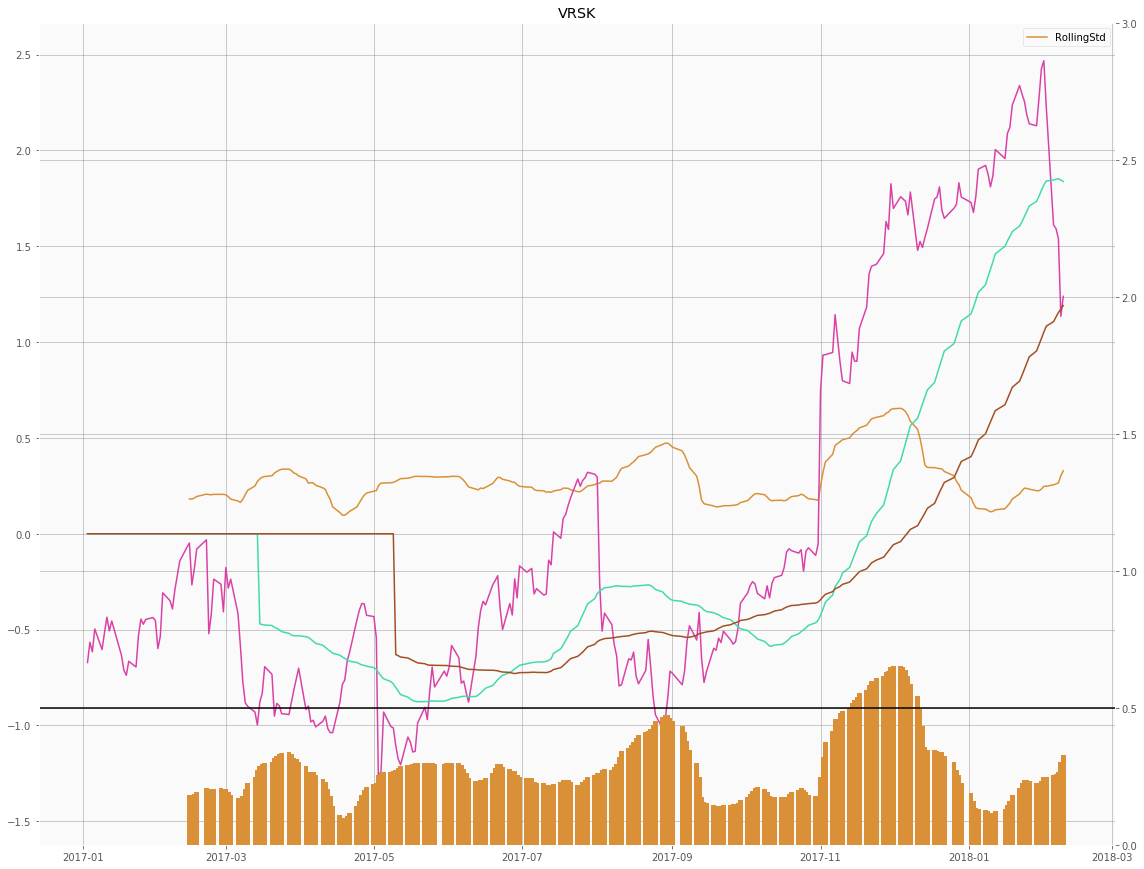

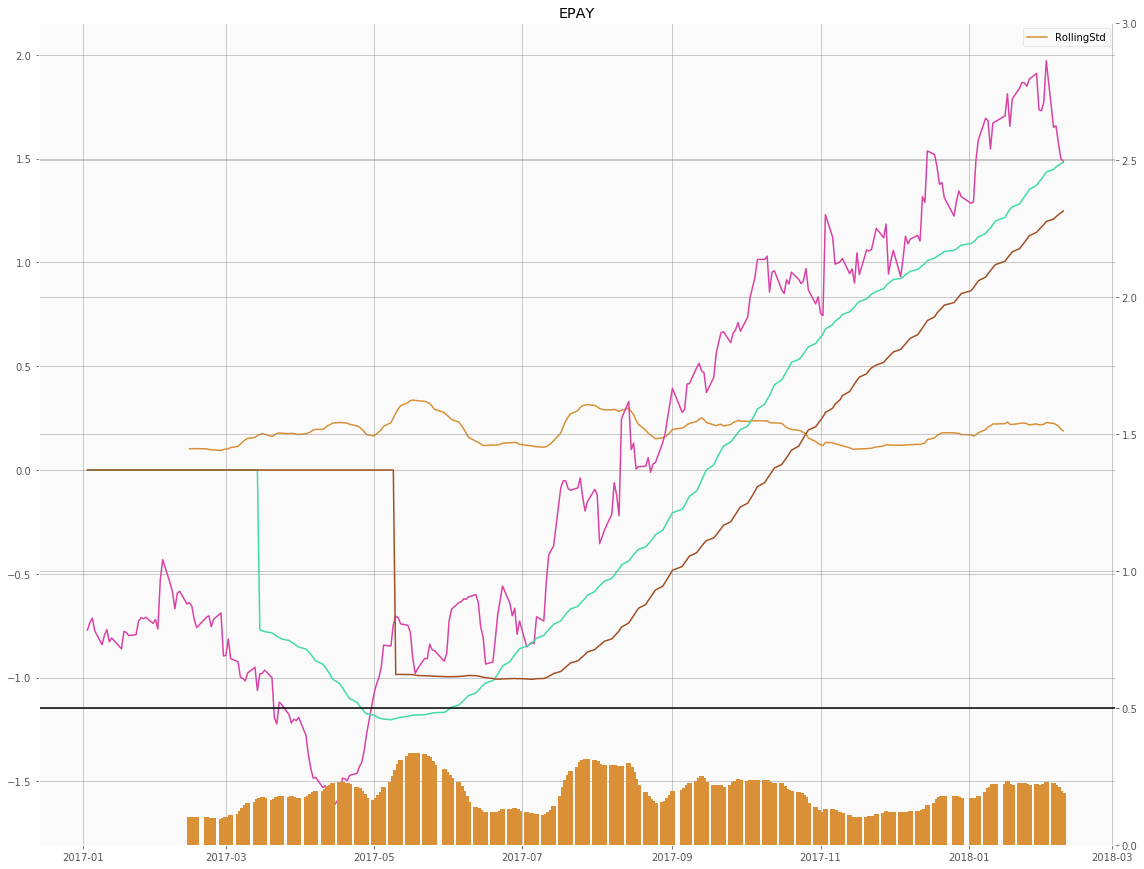

In [49]:
for sym in random.sample(all_sym_df.Symbol.unique().tolist(),50):
    
    sym_df = all_sym_df.loc[all_sym_df.Symbol == sym]
    fig, ax1 = plt.subplots(figsize=(16,12))
    
    buy_dates = sym_df[sym_df.Reversal == 1].Date
    sell_dates = sym_df[sym_df.Reversal == -1].Date
    
    buy_prices = sym_df[sym_df.Date.isin(buy_dates)].Close
    sell_prices = sym_df[sym_df.Date.isin(sell_dates)].Close
    
    
    ax1.plot(sym_df.Date,sym_df['RollingStd'], color = W.colors[3], label = 'RollingStd')
    ax1.legend()
    #ax1.set_ylim(-1,1)
    
    ax1.plot(sym_df.Date,sym_df['mavg1'],color = W.colors[4], label = 'mavg1')
    ax1.plot(sym_df.Date, sym_df['mavg50'],color = W.colors[5], label = 'mavg50')
    ax1.plot(sym_df.Date, sym_df['mavg90'],color = W.colors[6], label = 'mavg90')
    ax2 = ax1.twinx()
    ax2.bar(sym_df.Date.tolist(), height = sym_df['RollingStd'], color = W.colors[3], label = 'RollingStd', width = 2)
    ax2.set_ylim(0,3)
    ax2.axhline(0.5, color = 'black')
    
    #ax2.plot(buy_dates, buy_prices, linestyle = 'None', marker = '^', ms = 10, color = W.colors[2])
    #ax2.plot(sell_dates, sell_prices, linestyle = 'None', marker = 'v', ms = 10, color = W.colors[0])
    
    #plt.legend()
    fig.tight_layout()
    plt.title('{}'.format(sym))
    plt.show()

In [19]:
for sym in random.sample(all_sym_df.Symbol.unique().tolist(),50):
    
    sym_df = all_sym_df.loc[all_sym_df.Symbol == sym]
    sym_df = sym_df.fillna(0)
    fig, ax1 = plt.subplots(figsize=(16,12))

    ax1.bar(height = sym_df['RollingStd'], color = W.colors[3], label = 'RollingStd')

    
    #plt.legend()
    fig.tight_layout()
    plt.title('{}'.format(sym))
    plt.show()

TypeError: bar() missing 1 required positional argument: 'left'

In [28]:
sym_df

Close       Date    Diff  Return  Reversal  RollingDiffMax  \
204786 64.8200 2017-01-03  0.0000  0.0000         0          0.0000   
204787 66.7600 2017-01-04  0.0000  0.0000         0          0.0000   
204788 66.3800 2017-01-05  0.0000  0.0000         0          0.0000   
204789 65.4000 2017-01-06  0.0000  0.0000         0          0.0000   
204790 65.1900 2017-01-09  0.0000  0.0000         0          0.0000   
204791 65.6800 2017-01-10  0.0000  0.0000         0          0.0000   
204792 66.8900 2017-01-11  0.0000  0.0000         0          0.0000   
204793 66.8100 2017-01-12  0.0000  0.0000         0          0.0000   
204794 67.1700 2017-01-13  0.0000  0.0000         0          0.0000   
204795 66.4700 2017-01-17  0.0000  0.0000         0          0.0000   
204796 65.6800 2017-01-18  0.0000  0.0000         0          0.0000   
204797 66.4700 2017-01-19  0.0000  0.0000         0          0.0000   
204798 66.6500 2017-01-20  0.0000  0.0000         0          0.0000   
204799 67.1300 2017-01-23  0.0000  0.0000         0          0.0000   
204800 68.2100 2017-01-24  0.0000  0.0000         0          0.0000   
204801 68.2000 2017-01-25  0.0000  0.0000         0          0.0000   
204802 67.6700 2017-01-26  0.0000  0.0000         0          0.0000   
204803 67.4600 2017-01-27  0.0000  0.0000         0          0.0000   
204804 66.8900 2017-01-30  0.0000  0.0000         0          0.0000   
204805 66.7100 2017-01-31  0.0000  0.0000         0          0.0000   
204806 65.1900 2017-02-01  0.0000  0.0000         0          0.0000   
204807 65.0000 2017-02-02  0.0000  0.0000         0          0.0000   
204808 65.6900 2017-02-03  0.0000  0.0000         0          0.0000   
204809 65.1100 2017-02-06  0.0000  0.0000         0          0.0000   
204810 65.8300 2017-02-07  0.0000  0.0000         0          0.0000   
204811 66.7600 2017-02-08  0.0000  0.0000         0          0.0000   
204812 67.4400 2017-02-09  0.0000  0.0000         0          0.0000   
204813 67.5400 2017-02-10  0.0000  0.0000         0          0.0000   
204814 67.5000 2017-02-13  0.0000  0.0000         0          0.0000   
204815 68.2200 2017-02-14  0.0000  0.0000         0          0.0000   
204816 68.6000 2017-02-15  0.0000  0.0000         0          0.0000   
204817 68.2800 2017-02-16  0.0000  0.0000         0          0.0000   
204818 67.0200 2017-02-17  0.0000  0.0000         0          0.0000   
204819 68.2500 2017-02-21  0.0000  0.0000         0          0.0000   
204820 67.5500 2017-02-22  0.0000  0.0000         0          0.0000   
204821 66.0700 2017-02-23  0.0000  0.0000         0          0.0000   
204822 65.8300 2017-02-24  0.0000  0.0000         0          0.0000   
204823 66.0700 2017-02-27  0.0000  0.0000         0          0.0000   
204824 64.5400 2017-02-28  0.0000  0.0000         0          0.0000   
204825 65.1800 2017-03-01  0.0000  0.0000         0          0.0000   
204826 65.0300 2017-03-02  0.0000  0.0000         0          0.0000   
204827 64.8700 2017-03-03  0.0000  0.0000         0          0.0000   
204828 63.9000 2017-03-06  0.0000  0.0000         0          0.0000   
204829 63.8100 2017-03-07  0.0000  0.0000         0          0.0000   
204830 64.6100 2017-03-08  0.0000  0.0000         0          0.0000   
204831 63.7700 2017-03-09  0.0000  0.0000         0          0.0000   
204832 64.2000 2017-03-10  0.0000  0.0000         0          0.0000   
204833 63.3900 2017-03-13  0.0000  0.0000         0          0.0000   
204834 62.9800 2017-03-14  0.0000  0.0000         0          0.0000   
204835 63.5100 2017-03-15 -0.0112  0.0000         0          0.0000   
204836 63.5400 2017-03-16 -0.0163  0.0000         0          0.0000   
204837 61.6900 2017-03-17 -0.0366  0.0000         0          0.0000   
204838 61.1700 2017-03-20 -0.0575  0.0000         0          0.0000   
204839 59.4700 2017-03-21 -0.0813  0.0000         0          0.0000   
204840 60.0700 2017-03-22 -0.1018  0.0000         0          0.0000   
204841 60.0400 2017-03-23 -0.1244

In [35]:
fig, ax = plt.subplots()
ax.bar(sym_df.Date.tolist(), sym_df.RollingStd)
#ax.xaxis_date() 

<Container object of 279 artists>

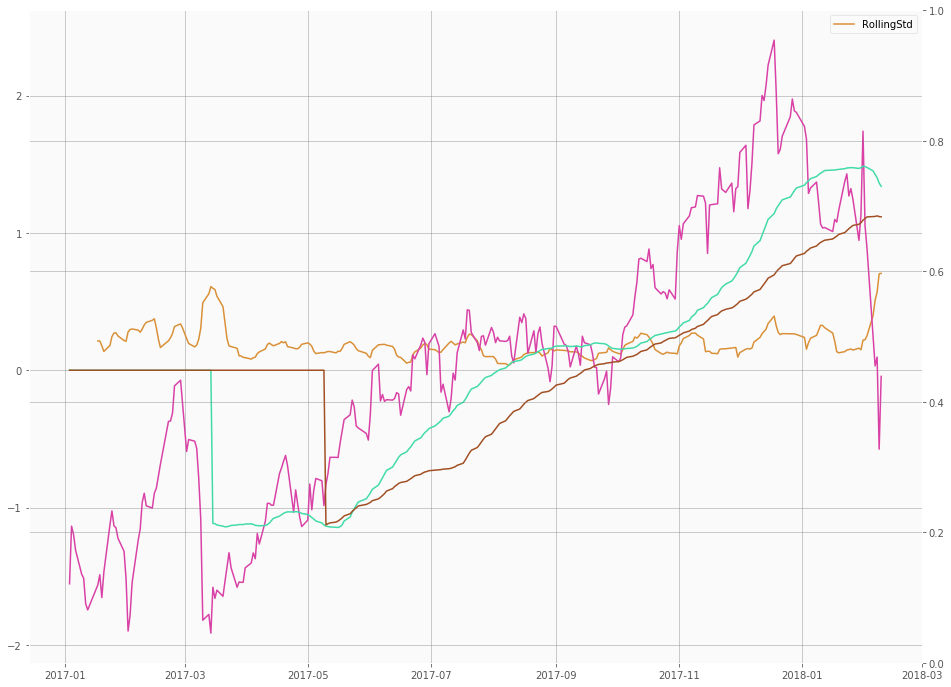

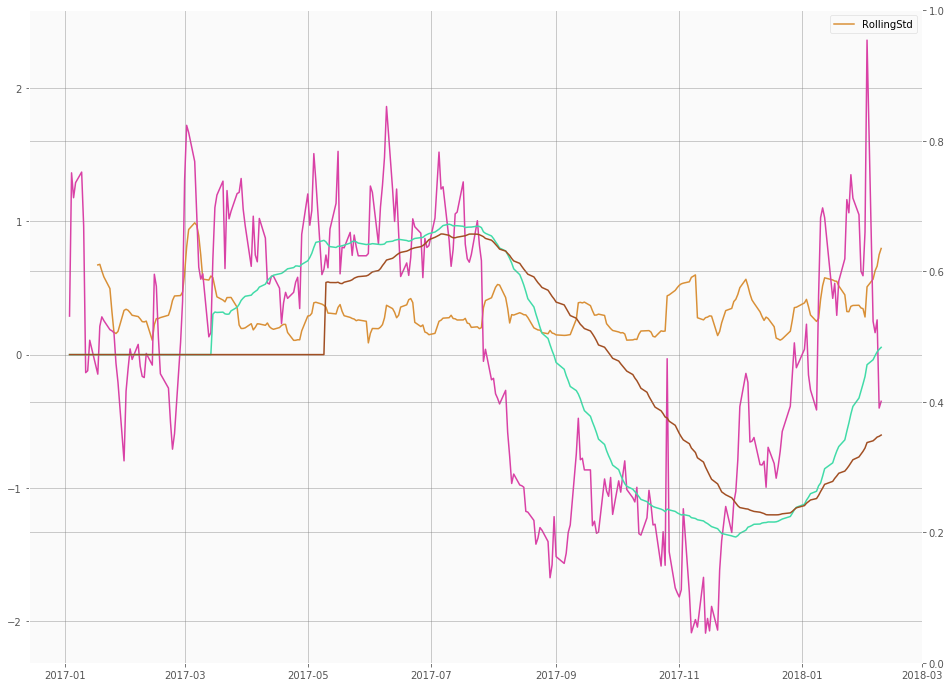

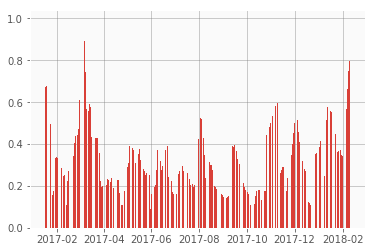

In [36]:
plt.show()

In [29]:
sym_df.RollingStd

204786   0.0000
204787   0.0000
204788   0.0000
204789   0.0000
204790   0.0000
204791   0.0000
204792   0.0000
204793   0.0000
204794   0.0000
204795   0.1640
204796   0.1400
204797   0.1364
204798   0.1389
204799   0.1354
204800   0.1482
204801   0.1555
204802   0.1615
204803   0.1625
204804   0.1630
204805   0.1597
204806   0.1808
204807   0.2216
204808   0.2346
204809   0.2564
204810   0.2336
204811   0.1986
204812   0.1916
204813   0.1940
204814   0.2068
204815   0.2404
204816   0.2585
204817   0.2413
204818   0.2205
204819   0.1697
204820   0.1199
204821   0.1489
204822   0.1886
204823   0.2087
204824   0.2729
204825   0.2823
204826   0.2675
204827   0.2460
204828   0.2690
204829   0.2272
204830   0.1639
204831   0.1611
204832   0.1452
204833   0.1213
204834   0.1469
204835   0.1333
204836   0.1144
204837   0.1581
204838   0.2148
204839   0.3175
204840   0.3340
204841   0.3481
204842   0.3407
204843   0.3518
204844   0.3334
204845   0.2733
204846   0.1630
204847   0.1246
204848  